<a href="https://colab.research.google.com/github/OmdenaAI/cameroon-chapter-nlp-restore-peace/blob/main/cameroon-chapter-nlp-restore-peace/src/tasks/task-2-preprocessing/endanglocrisis_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
FILE_PATH = ""
SEP = ''

In [ ]:
data_FB = pd.read_csv(FILE_PATH, sep=',',encoding = "UTF-8")

In [ ]:
data_FB.head()

Page Name  \
0       CAF Commerce Africain   
1                Arreyb Media   
2                  Remy Ngono   
3  Fan Club Samuel Eto'o Fils   
4              Mimi Mefo Info   

                                                 URL  \
0  https://www.facebook.com/703081549789449/posts...   
1  https://www.facebook.com/106265200719815/posts...   
2  https://www.facebook.com/919395438073615/posts...   
3  https://www.facebook.com/1608058626149931/post...   
4  https://www.facebook.com/1927380740639827/post...   

                                             Message  \
0  Cameroun - Décrouvrez un talent à l'état brute...   
1  Scarce Warfront Video ! As election day approc...   
2  ARRÊT SUR IMAGES Il y a exactement 35 ans, le ...   
3  #SamuelEtoo, #ambassadeur de l'#Unicef. Résumé...   
4  Cameroonian soldiers have dug out an Improvise...   

                                                Link       Page Category  \
0  https://www.facebook.com/cafcommerceafricain/v...        ENTREPRENEUR   
1  https://www.facebook.com/arreybmediaa/videos/8...  MEDIA_NEWS_COMPANY   
2  https://www.facebook.com/RemyNgonofficiel/phot...           NEWS_SITE   
3  https://www.facebook.com/TeamSEF9/photos/a.160...            FAN_PAGE   
4  https://www.facebook.com/MimiMefoInfo/videos/2...  MEDIA_NEWS_COMPANY   

  Page Admin Top Country         Page Created             Post Created  \
0                     BE  2014-12-26 19:13:25  2019-04-19 17:48:53 GMT   
1                     CM  2019-08-01 21:54:02  2020-01-12 14:41:39 GMT   
2                     FR  2014-12-21 11:55:08  2017-11-04 18:31:07 GMT   
3                     CM  2015-08-03 13:32:25  2017-03-24 23:03:04 GMT   
4                     GB  2018-07-10 22:06:06  2021-05-03 10:55:20 GMT   

  Total Interactions  Likes  Comments  Shares  Love  Wow  Haha  Sad  Angry  \
0             65,569  34701      1762   26932  1475  593    68   24     14   
1             54,404  48634       294    3679   706  248   278   83    136   
2             28,414   8293      3648   15780    88   20    24  529     32   
3             24,207  23465       378     201   146   13     3    1      0   
4             23,181  14334      1804    6164   242   79   311   85     39   

   Care  
0     0  
1   346  
2     0  
3     0  
4   123

In [ ]:
len(data_FB)

53200

In [ ]:
data_FB_with_column_of_interest = data_FB.drop(['URL', 'Link'], axis=1) # I don't need those

In [ ]:
data_FB_with_column_of_interest.head()

Page Name  \
0       CAF Commerce Africain   
1                Arreyb Media   
2                  Remy Ngono   
3  Fan Club Samuel Eto'o Fils   
4              Mimi Mefo Info   

                                             Message       Page Category  \
0  Cameroun - Décrouvrez un talent à l'état brute...        ENTREPRENEUR   
1  Scarce Warfront Video ! As election day approc...  MEDIA_NEWS_COMPANY   
2  ARRÊT SUR IMAGES Il y a exactement 35 ans, le ...           NEWS_SITE   
3  #SamuelEtoo, #ambassadeur de l'#Unicef. Résumé...            FAN_PAGE   
4  Cameroonian soldiers have dug out an Improvise...  MEDIA_NEWS_COMPANY   

  Page Admin Top Country         Page Created             Post Created  \
0                     BE  2014-12-26 19:13:25  2019-04-19 17:48:53 GMT   
1                     CM  2019-08-01 21:54:02  2020-01-12 14:41:39 GMT   
2                     FR  2014-12-21 11:55:08  2017-11-04 18:31:07 GMT   
3                     CM  2015-08-03 13:32:25  2017-03-24 23:03:04 GMT   
4                     GB  2018-07-10 22:06:06  2021-05-03 10:55:20 GMT   

  Total Interactions  Likes  Comments  Shares  Love  Wow  Haha  Sad  Angry  \
0             65,569  34701      1762   26932  1475  593    68   24     14   
1             54,404  48634       294    3679   706  248   278   83    136   
2             28,414   8293      3648   15780    88   20    24  529     32   
3             24,207  23465       378     201   146   13     3    1      0   
4             23,181  14334      1804    6164   242   79   311   85     39   

   Care  
0     0  
1   346  
2     0  
3     0  
4   123

In [ ]:
np.unique(data_FB_with_column_of_interest['Page Name'])

array(["00237 Ici c'est le Cameroun", '100% Infos K-mer: par WAYNE',
       '100%Jeune Cameroun - Officiel', ..., 'Ô Grandes  Dames Mag',
       '𝑺𝑨𝑵𝑨𝑩𝑬', '𝗖𝗔𝗠𝗘𝗥𝟮𝟰'], dtype=object)

In [ ]:
data_FB_with_column_of_interest['Page Name'].count()

53200

In [ ]:
page_names = list(data_FB_with_column_of_interest['Page Name'].unique())
len(page_names)

1433

In [ ]:
data_page_name =  data_FB_with_column_of_interest['Page Name'].value_counts().rename_axis('Page Name').reset_index(name='counts')
data_page_name.head(10)

Page Name  counts
0                                ActuCameroun    2509
1                              Mimi Mefo Info    2474
2                                 CamerounWeb    2154
3                       Cameroon  News Agency    1159
4                          Base News Cameroon    1151
5                        Bui County Worldwide    1015
6                                Amba updates     894
7  237online.com, l'ouverture sur le Cameroun     862
8                               Le Bled Parle     803
9                Cameroon Intelligence Report     756

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

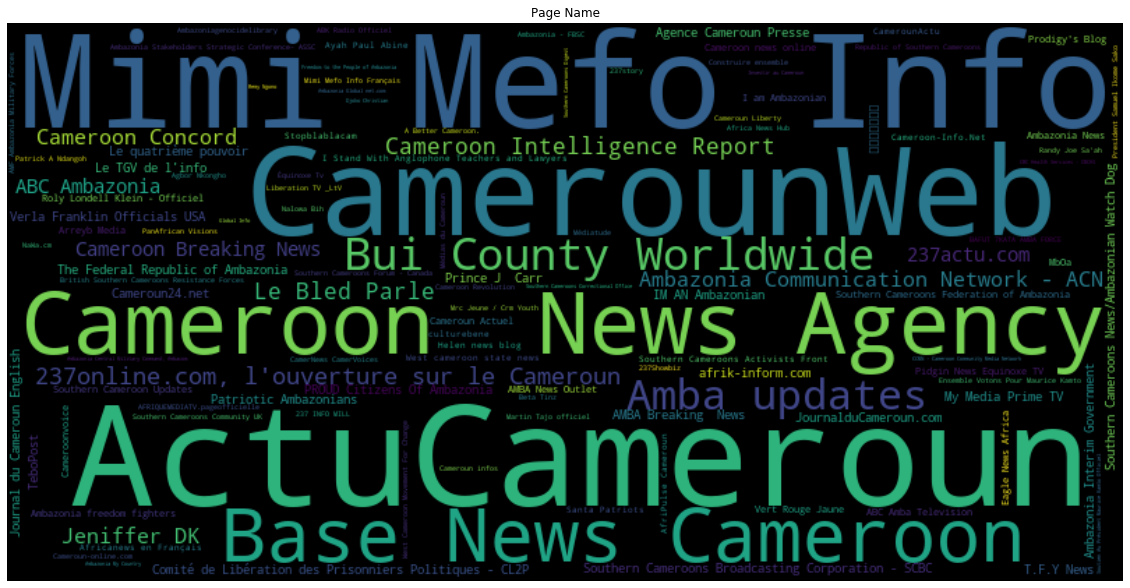

In [ ]:
dataPageName = dict(zip(data_page_name['Page Name'].tolist(), data_page_name['counts'].tolist()))
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(dataPageName)
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Page Name')
plt.show()

In [ ]:
data_Page_Admin_Top_Country =  data_FB_with_column_of_interest['Page Admin Top Country'].value_counts().rename_axis('Page Admin Top Country').reset_index(name='counts')
data_Page_Admin_Top_Country.head(10)

Page Admin Top Country  counts
0                     CM   22923
1                     US    6010
2                     DE    5904
3                     GB    4129
4                     FR    2189
5                     TG    2159
6                     CA    1531
7                     NG    1199
8                     BE     901
9                     ZA     894

In [ ]:
len(data_Page_Admin_Top_Country)

57

C:\Users\Dev05\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


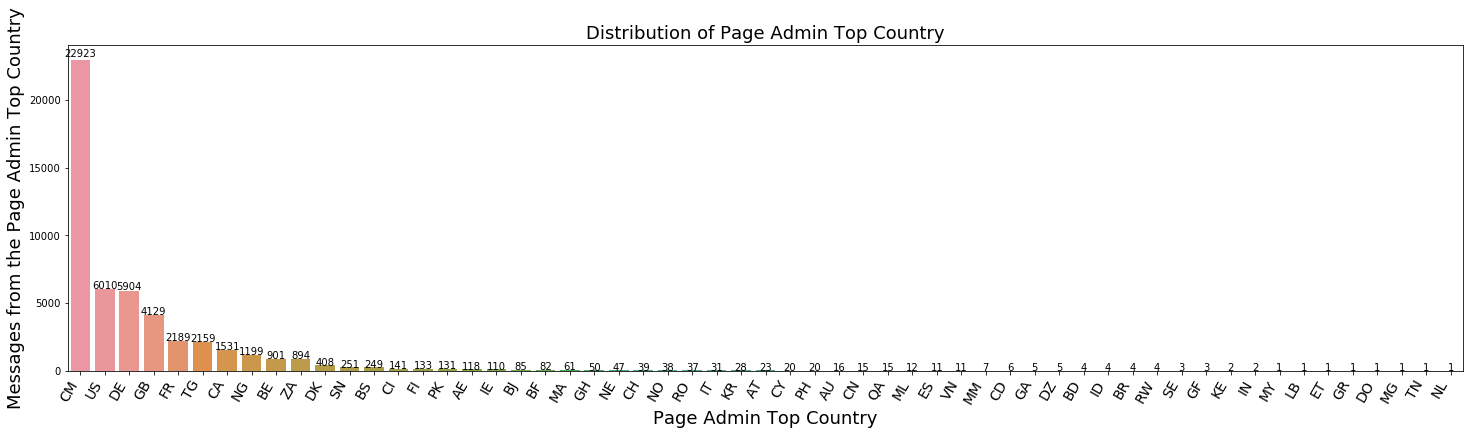

In [ ]:
X = data_Page_Admin_Top_Country['Page Admin Top Country']
Y = data_Page_Admin_Top_Country['counts']
fig, ax = plt.subplots(figsize=(25,6))
ax = sns.barplot(X,Y, order=X)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment='right',fontsize=14)
for p, q in zip(ax.patches, Y):
    ax.text(p.get_x()+p.get_width()/2.,
        p.get_height()*(1.01),
        "{}".format(q),
        ha = 'center'  )
plt.title('Distribution of Page Admin Top Country', fontsize=18)
plt.ylabel('Messages from the Page Admin Top Country', fontsize=18)
plt.xlabel('Page Admin Top Country', fontsize=18)
plt.show()

In [ ]:
data_Page_Categorye =  data_FB_with_column_of_interest['Page Category'].value_counts().rename_axis('Page Category').reset_index(name='counts')
data_Page_Categorye.head(10)

Page Category  counts
0  MEDIA_NEWS_COMPANY   12650
1           NEWS_SITE    9196
2    ACTIVITY_GENERAL    7435
3           COMMUNITY    2662
4              PERSON    1933
5          TV_CHANNEL    1827
6       PERSONAL_BLOG    1302
7            MAGAZINE    1205
8                 NGO    1027
9               MEDIA    1020

In [ ]:
len(data_Page_Categorye)

173

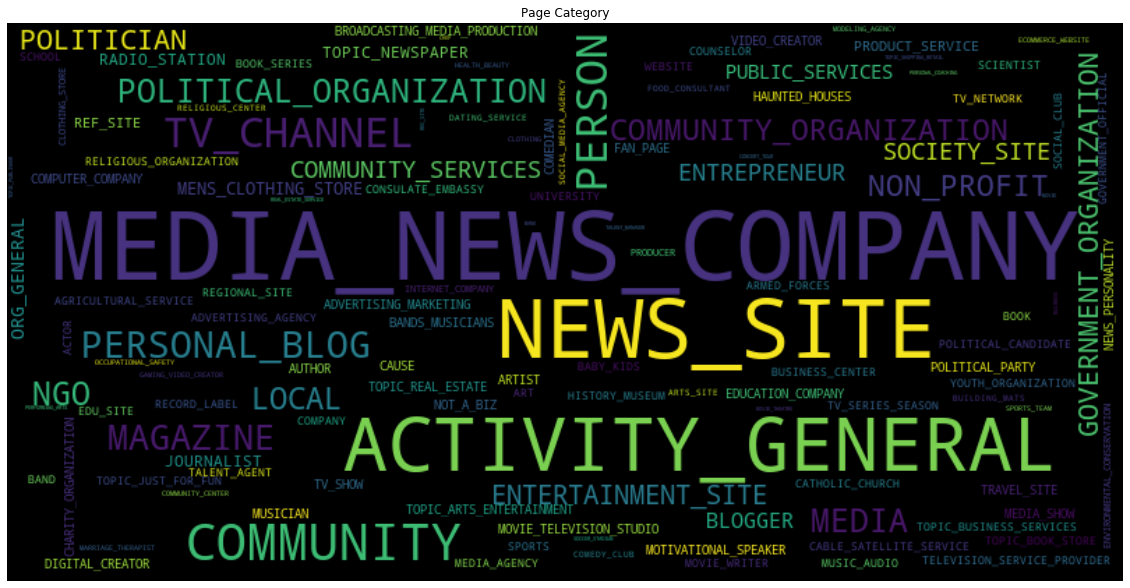

In [ ]:
dataPageCategorye = dict(zip(data_Page_Categorye['Page Category'].tolist(), data_Page_Categorye['counts'].tolist()))
wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(dataPageCategorye)
plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Page Category')
plt.show()

In [ ]:
from langdetect import detect
from cleantext import clean
import re #to remove undesirable stuffs from text
from stop_words import get_stop_words

In [ ]:
stop_words_list = (list(
    set(get_stop_words('en'))
    |set(get_stop_words('es'))
    |set(get_stop_words('de'))
    |set(get_stop_words('it'))
    |set(get_stop_words('ca'))
    |set(get_stop_words('fr'))
    |set(get_stop_words('pt'))
    |set(get_stop_words('pl'))
    |set(get_stop_words('da'))
    |set(get_stop_words('ru'))
    |set(get_stop_words('sv'))
    |set(get_stop_words('sk'))
    |set(get_stop_words('nl'))
))

In [ ]:
!pip install contractions

In [ ]:
#@title deEmojify: Function to remove emojis 
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\u231A-\u231B"
        u"\u23E9-\u23EC"
        u"\u25FD-\u25FE"
        u"\u2614-\u2615"
        u"\u2648-\u2653"
        u"\u26AA-\u26AB"
        u"\u26BD-\u26BE"
        u"\u26C4-\u26C5"
        u"\u26F2-\u26F3"
        u"\u270A-\u270B"
        u"\u2753-\u2755"
        u"\u2795-\u2797"
        u"\u2B1B-\u2B1C"
        u"\U0001F191-\U0001F19A"
        u"\U0001F232-\U0001F236"
        u"\U0001F238-\U0001F23A"
        u"\U0001F250-\U0001F251"
        u"\U0001F300-\U0001F30C"
        u"\U0001F30D-\U0001F30E"
        u"\U0001F313-\U0001F315"
        u"\U0001F316-\U0001F318"
        u"\U0001F31D-\U0001F31E"
        u"\U0001F31F-\U0001F320"
        u"\U0001F32D-\U0001F32F"
        u"\U0001F330-\U0001F331"
        u"\U0001F332-\U0001F333"
        u"\U0001F334-\U0001F335"
        u"\U0001F337-\U0001F34A"
        u"\U0001F34C-\U0001F34F"
        u"\U0001F351-\U0001F37B"
        u"\U0001F37E-\U0001F37F"
        u"\U0001F380-\U0001F393"
        u"\U0001F3A0-\U0001F3C4"
        u"\U0001F3CF-\U0001F3D3"
        u"\U0001F3E0-\U0001F3E3"
        u"\U0001F3E5-\U0001F3F0"
        u"\U0001F3F8-\U0001F407"
        u"\U0001F409-\U0001F40B"
        u"\U0001F40C-\U0001F40E"
        u"\U0001F40F-\U0001F410"
        u"\U0001F411-\U0001F412"
        u"\U0001F417-\U0001F429"
        u"\U0001F42B-\U0001F43E"
        u"\U0001F442-\U0001F464"
        u"\U0001F466-\U0001F46B"
        u"\U0001F46C-\U0001F46D"
        u"\U0001F46E-\U0001F4AC"
        u"\U0001F4AE-\U0001F4B5"
        u"\U0001F4B6-\U0001F4B7"
        u"\U0001F4B8-\U0001F4EB"
        u"\U0001F4EC-\U0001F4ED"
        u"\U0001F4F0-\U0001F4F4"
        u"\U0001F4F6-\U0001F4F7"
        u"\U0001F4F9-\U0001F4FC"
        u"\U0001F4FF-\U0001F502"
        u"\U0001F504-\U0001F507"
        u"\U0001F50A-\U0001F514"
        u"\U0001F516-\U0001F52B"
        u"\U0001F52C-\U0001F52D"
        u"\U0001F52E-\U0001F53D"
        u"\U0001F54B-\U0001F54E"
        u"\U0001F550-\U0001F55B"
        u"\U0001F55C-\U0001F567"
        u"\U0001F595-\U0001F596"
        u"\U0001F5FB-\U0001F5FF"
        u"\U0001F601-\U0001F606"
        u"\U0001F607-\U0001F608"
        u"\U0001F609-\U0001F60D"
        u"\U0001F612-\U0001F614"
        u"\U0001F61C-\U0001F61E"
        u"\U0001F620-\U0001F625"
        u"\U0001F626-\U0001F627"
        u"\U0001F628-\U0001F62B"
        u"\U0001F62E-\U0001F62F"
        u"\U0001F630-\U0001F633"
        u"\U0001F637-\U0001F640"
        u"\U0001F641-\U0001F644"
        u"\U0001F645-\U0001F64F"
        u"\U0001F681-\U0001F682"
        u"\U0001F683-\U0001F685"
        u"\U0001F68A-\U0001F68B"
        u"\U0001F691-\U0001F693"
        u"\U0001F699-\U0001F69A"
        u"\U0001F69B-\U0001F6A1"
        u"\U0001F6A4-\U0001F6A5"
        u"\U0001F6A7-\U0001F6AD"
        u"\U0001F6AE-\U0001F6B1"
        u"\U0001F6B3-\U0001F6B5"
        u"\U0001F6B7-\U0001F6B8"
        u"\U0001F6B9-\U0001F6BE"
        u"\U0001F6C1-\U0001F6C5"
        u"\U0001F6D1-\U0001F6D2"
        u"\U0001F6D6-\U0001F6D7"
        u"\U0001F6DD-\U0001F6DF"
        u"\U0001F6EB-\U0001F6EC"
        u"\U0001F6F4-\U0001F6F6"
        u"\U0001F6F7-\U0001F6F8"
        u"\U0001F6FB-\U0001F6FC"
        u"\U0001F7E0-\U0001F7EB"
        u"\U0001F90D-\U0001F90F"
        u"\U0001F910-\U0001F918"
        u"\U0001F919-\U0001F91E"
        u"\U0001F920-\U0001F927"
        u"\U0001F928-\U0001F92F"
        u"\U0001F931-\U0001F932"
        u"\U0001F933-\U0001F93A"
        u"\U0001F93C-\U0001F93E"
        u"\U0001F940-\U0001F945"
        u"\U0001F947-\U0001F94B"
        u"\U0001F94D-\U0001F94F"
        u"\U0001F950-\U0001F95E"
        u"\U0001F95F-\U0001F96B"
        u"\U0001F96C-\U0001F970"
        u"\U0001F973-\U0001F976"
        u"\U0001F977-\U0001F978"
        u"\U0001F97C-\U0001F97F"
        u"\U0001F980-\U0001F984"
        u"\U0001F985-\U0001F991"
        u"\U0001F992-\U0001F997"
        u"\U0001F998-\U0001F9A2"
        u"\U0001F9A3-\U0001F9A4"
        u"\U0001F9A5-\U0001F9AA"
        u"\U0001F9AB-\U0001F9AD"
        u"\U0001F9AE-\U0001F9AF"
        u"\U0001F9B0-\U0001F9B9"
        u"\U0001F9BA-\U0001F9BF"
        u"\U0001F9C1-\U0001F9C2"
        u"\U0001F9C3-\U0001F9CA"
        u"\U0001F9CD-\U0001F9CF"
        u"\U0001F9D0-\U0001F9E6"
        u"\U0001F9E7-\U0001F9FF"
        u"\U0001FA70-\U0001FA73"
        u"\U0001FA78-\U0001FA7A"
        u"\U0001FA7B-\U0001FA7C"
        u"\U0001FA80-\U0001FA82"
        u"\U0001FA83-\U0001FA86"
        u"\U0001FA90-\U0001FA95"
        u"\U0001FA96-\U0001FAA8"
        u"\U0001FAA9-\U0001FAAC"
        u"\U0001FAB0-\U0001FAB6"
        u"\U0001FAB7-\U0001FABA"
        u"\U0001FAC0-\U0001FAC2"
        u"\U0001FAC3-\U0001FAC5"
        u"\U0001FAD0-\U0001FAD6"
        u"\U0001FAD7-\U0001FAD9"
        u"\U0001FAE0-\U0001FAE7"
        u"\U0001FAF0-\U0001FAF6"
        u"\u23F0"
        u"\u23F3"
        u"\u267F"
        u"\u2693"
        u"\u26A1"
        u"\u26CE"
        u"\u26D4"
        u"\u26EA"
        u"\u26F5"
        u"\u26FA"
        u"\u26FD"
        u"\u2705"
        u"\u2728"
        u"\u274C"
        u"\u274E"
        u"\u2757"
        u"\u27B0"
        u"\u27BF"
        u"\u2B50"
        u"\u2B55"
        u"\U0001F004"
        u"\U0001F0CF"
        u"\U0001F18E"
        u"\U0001F201"
        u"\U0001F21A"
        u"\U0001F22F"
        u"\U0001F30F"
        u"\U0001F310"
        u"\U0001F311"
        u"\U0001F312"
        u"\U0001F319"
        u"\U0001F31A"
        u"\U0001F31B"
        u"\U0001F31C"
        u"\U0001F34B"
        u"\U0001F350"
        u"\U0001F37C"
        u"\U0001F3C5"
        u"\U0001F3C6"
        u"\U0001F3C7"
        u"\U0001F3C8"
        u"\U0001F3C9"
        u"\U0001F3CA"
        u"\U0001F3E4"
        u"\U0001F3F4"
        u"\U0001F408"
        u"\U0001F413"
        u"\U0001F414"
        u"\U0001F415"
        u"\U0001F416"
        u"\U0001F42A"
        u"\U0001F440"
        u"\U0001F465"
        u"\U0001F4AD"
        u"\U0001F4EE"
        u"\U0001F4EF"
        u"\U0001F4F5"
        u"\U0001F4F8"
        u"\U0001F503"
        u"\U0001F508"
        u"\U0001F509"
        u"\U0001F515"
        u"\U0001F57A"
        u"\U0001F5A4"
        u"\U0001F600"
        u"\U0001F60E"
        u"\U0001F60F"
        u"\U0001F610"
        u"\U0001F611"
        u"\U0001F615"
        u"\U0001F616"
        u"\U0001F617"
        u"\U0001F618"
        u"\U0001F619"
        u"\U0001F61A"
        u"\U0001F61B"
        u"\U0001F61F"
        u"\U0001F62C"
        u"\U0001F62D"
        u"\U0001F634"
        u"\U0001F635"
        u"\U0001F636"
        u"\U0001F680"
        u"\U0001F686"
        u"\U0001F687"
        u"\U0001F688"
        u"\U0001F689"
        u"\U0001F68C"
        u"\U0001F68D"
        u"\U0001F68E"
        u"\U0001F68F"
        u"\U0001F690"
        u"\U0001F694"
        u"\U0001F695"
        u"\U0001F696"
        u"\U0001F697"
        u"\U0001F698"
        u"\U0001F6A2"
        u"\U0001F6A3"
        u"\U0001F6A6"
        u"\U0001F6B2"
        u"\U0001F6B6"
        u"\U0001F6BF"
        u"\U0001F6C0"
        u"\U0001F6CC"
        u"\U0001F6D0"
        u"\U0001F6D5"
        u"\U0001F6F9"
        u"\U0001F6FA"
        u"\U0001F7F0"
        u"\U0001F90C"
        u"\U0001F91F"
        u"\U0001F930"
        u"\U0001F93F"
        u"\U0001F94C"
        u"\U0001F971"
        u"\U0001F972"
        u"\U0001F979"
        u"\U0001F97A"
        u"\U0001F97B"
        u"\U0001F9C0"
        u"\U0001F9CB"
        u"\U0001F9CC"
        u"\U0001FA74"
        u"\u00A9"
        u"\uFE0F"
        u"\u00AE"
        u"\uFE0F"
        u"\u203C"
        u"\uFE0F"
        u"\u2049"
        u"\uFE0F"
        u"\u2122"
        u"\uFE0F"
        u"\u2139"
        u"\uFE0F"
        u"\u2194"
        u"\uFE0F"
        u"\u2195"
        u"\uFE0F"
        u"\u2196"
        u"\uFE0F"
        u"\u2197"
        u"\uFE0F"
        u"\u2198"
        u"\uFE0F"
        u"\u2199"
        u"\uFE0F"
        u"\u21A9"
        u"\uFE0F"
        u"\u21AA"
        u"\uFE0F"
        u"\u2328"
        u"\uFE0F"
        u"\u23CF"
        u"\uFE0F"
        u"\u23ED"
        u"\uFE0F"
        u"\u23EE"
        u"\uFE0F"
        u"\u23EF"
        u"\uFE0F"
        u"\u23F1"
        u"\uFE0F"
        u"\u23F2"
        u"\uFE0F"
        u"\u23F8"
        u"\uFE0F"
        u"\u23F9"
        u"\uFE0F"
        u"\u23FA"
        u"\uFE0F"
        u"\u24C2"
        u"\uFE0F"
        u"\u25AA"
        u"\uFE0F"
        u"\u25AB"
        u"\uFE0F"
        u"\u25B6"
        u"\uFE0F"
        u"\u25C0"
        u"\uFE0F"
        u"\u25FB"
        u"\uFE0F"
        u"\u25FC"
        u"\uFE0F"
        u"\u2600"
        u"\uFE0F"
        u"\u2601"
        u"\uFE0F"
        u"\u2602"
        u"\uFE0F"
        u"\u2603"
        u"\uFE0F"
        u"\u2604"
        u"\uFE0F"
        u"\u260E"
        u"\uFE0F"
        u"\u2611"
        u"\uFE0F"
        u"\u2618"
        u"\uFE0F"
        u"\u261D"
        u"\uFE0F"
        u"\u2620"
        u"\uFE0F"
        u"\u2622"
        u"\uFE0F"
        u"\u2623"
        u"\uFE0F"
        u"\u2626"
        u"\uFE0F"
        u"\u262A"
        u"\uFE0F"
        u"\u262E"
        u"\uFE0F"
        u"\u262F"
        u"\uFE0F"
        u"\u2638"
        u"\uFE0F"
        u"\u2639"
        u"\uFE0F"
        u"\u263A"
        u"\uFE0F"
        u"\u2640"
        u"\uFE0F"
        u"\u2642"
        u"\uFE0F"
        u"\u265F"
        u"\uFE0F"
        u"\u2660"
        u"\uFE0F"
        u"\u2663"
        u"\uFE0F"
        u"\u2665"
        u"\uFE0F"
        u"\u2666"
        u"\uFE0F"
        u"\u2668"
        u"\uFE0F"
        u"\u267B"
        u"\uFE0F"
        u"\u267E"
        u"\uFE0F"
        u"\u2692"
        u"\uFE0F"
        u"\u2694"
        u"\uFE0F"
        u"\u2695"
        u"\uFE0F"
        u"\u2696"
        u"\uFE0F"
        u"\u2697"
        u"\uFE0F"
        u"\u2699"
        u"\uFE0F"
        u"\u269B"
        u"\uFE0F"
        u"\u269C"
        u"\uFE0F"
        u"\u26A0"
        u"\uFE0F"
        u"\u26A7"
        u"\uFE0F"
        u"\u26B0"
        u"\uFE0F"
        u"\u26B1"
        u"\uFE0F"
        u"\u26C8"
        u"\uFE0F"
        u"\u26CF"
        u"\uFE0F"
        u"\u26D1"
        u"\uFE0F"
        u"\u26D3"
        u"\uFE0F"
        u"\u26E9"
        u"\uFE0F"
        u"\u26F0"
        u"\uFE0F"
        u"\u26F1"
        u"\uFE0F"
        u"\u26F4"
        u"\uFE0F"
        u"\u26F7"
        u"\uFE0F"
        u"\u26F8"
        u"\uFE0F"
        u"\u26F9"
        u"\uFE0F"
        u"\u2702"
        u"\uFE0F"
        u"\u2708"
        u"\uFE0F"
        u"\u2709"
        u"\uFE0F"
        u"\u270C"
        u"\uFE0F"
        u"\u270D"
        u"\uFE0F"
        u"\u270F"
        u"\uFE0F"
        u"\u2712"
        u"\uFE0F"
        u"\u2714"
        u"\uFE0F"
        u"\u2716"
        u"\uFE0F"
        u"\u271D"
        u"\uFE0F"
        u"\u2721"
        u"\uFE0F"
        u"\u2733"
        u"\uFE0F"
        u"\u2734"
        u"\uFE0F"
        u"\u2744"
        u"\uFE0F"
        u"\u2747"
        u"\uFE0F"
        u"\u2763"
        u"\uFE0F"
        u"\u2764"
        u"\uFE0F"
        u"\u27A1"
        u"\uFE0F"
        u"\u2934"
        u"\uFE0F"
        u"\u2935"
        u"\uFE0F"
        u"\u2B05"
        u"\uFE0F"
        u"\u2B06"
        u"\uFE0F"
        u"\u2B07"
        u"\uFE0F"
        u"\u3030"
        u"\uFE0F"
        u"\u303D"
        u"\uFE0F"
        u"\u3297"
        u"\uFE0F"
        u"\u3299"
        u"\uFE0F"
        u"\U0001F170"
        u"\uFE0F"
        u"\U0001F171"
        u"\uFE0F"
        u"\U0001F17E"
        u"\uFE0F"
        u"\U0001F17F"
        u"\uFE0F"
        u"\U0001F202"
        u"\uFE0F"
        u"\U0001F237"
        u"\uFE0F"
        u"\U0001F321"
        u"\uFE0F"
        u"\U0001F324"
        u"\uFE0F"
        u"\U0001F325"
        u"\uFE0F"
        u"\U0001F326"
        u"\uFE0F"
        u"\U0001F327"
        u"\uFE0F"
        u"\U0001F328"
        u"\uFE0F"
        u"\U0001F329"
        u"\uFE0F"
        u"\U0001F32A"
        u"\uFE0F"
        u"\U0001F32B"
        u"\uFE0F"
        u"\U0001F32C"
        u"\uFE0F"
        u"\U0001F336"
        u"\uFE0F"
        u"\U0001F37D"
        u"\uFE0F"
        u"\U0001F396"
        u"\uFE0F"
        u"\U0001F397"
        u"\uFE0F"
        u"\U0001F399"
        u"\uFE0F"
        u"\U0001F39A"
        u"\uFE0F"
        u"\U0001F39B"
        u"\uFE0F"
        u"\U0001F39E"
        u"\uFE0F"
        u"\U0001F39F"
        u"\uFE0F"
        u"\U0001F3CB"
        u"\uFE0F"
        u"\U0001F3CC"
        u"\uFE0F"
        u"\U0001F3CD"
        u"\uFE0F"
        u"\U0001F3CE"
        u"\uFE0F"
        u"\U0001F3D4"
        u"\uFE0F"
        u"\U0001F3D5"
        u"\uFE0F"
        u"\U0001F3D6"
        u"\uFE0F"
        u"\U0001F3D7"
        u"\uFE0F"
        u"\U0001F3D8"
        u"\uFE0F"
        u"\U0001F3D9"
        u"\uFE0F"
        u"\U0001F3DA"
        u"\uFE0F"
        u"\U0001F3DB"
        u"\uFE0F"
        u"\U0001F3DC"
        u"\uFE0F"
        u"\U0001F3DD"
        u"\uFE0F"
        u"\U0001F3DE"
        u"\uFE0F"
        u"\U0001F3DF"
        u"\uFE0F"
        u"\U0001F3F3"
        u"\uFE0F"
        u"\U0001F3F5"
        u"\uFE0F"
        u"\U0001F3F7"
        u"\uFE0F"
        u"\U0001F43F"
        u"\uFE0F"
        u"\U0001F441"
        u"\uFE0F"
        u"\U0001F4FD"
        u"\uFE0F"
        u"\U0001F549"
        u"\uFE0F"
        u"\U0001F54A"
        u"\uFE0F"
        u"\U0001F56F"
        u"\uFE0F"
        u"\U0001F570"
        u"\uFE0F"
        u"\U0001F573"
        u"\uFE0F"
        u"\U0001F574"
        u"\uFE0F"
        u"\U0001F575"
        u"\uFE0F"
        u"\U0001F576"
        u"\uFE0F"
        u"\U0001F577"
        u"\uFE0F"
        u"\U0001F578"
        u"\uFE0F"
        u"\U0001F579"
        u"\uFE0F"
        u"\U0001F587"
        u"\uFE0F"
        u"\U0001F58A"
        u"\uFE0F"
        u"\U0001F58B"
        u"\uFE0F"
        u"\U0001F58C"
        u"\uFE0F"
        u"\U0001F58D"
        u"\uFE0F"
        u"\U0001F590"
        u"\uFE0F"
        u"\U0001F5A5"
        u"\uFE0F"
        u"\U0001F5A8"
        u"\uFE0F"
        u"\U0001F5B1"
        u"\uFE0F"
        u"\U0001F5B2"
        u"\uFE0F"
        u"\U0001F5BC"
        u"\uFE0F"
        u"\U0001F5C2"
        u"\uFE0F"
        u"\U0001F5C3"
        u"\uFE0F"
        u"\U0001F5C4"
        u"\uFE0F"
        u"\U0001F5D1"
        u"\uFE0F"
        u"\U0001F5D2"
        u"\uFE0F"
        u"\U0001F5D3"
        u"\uFE0F"
        u"\U0001F5DC"
        u"\uFE0F"
        u"\U0001F5DD"
        u"\uFE0F"
        u"\U0001F5DE"
        u"\uFE0F"
        u"\U0001F5E1"
        u"\uFE0F"
        u"\U0001F5E3"
        u"\uFE0F"
        u"\U0001F5E8"
        u"\uFE0F"
        u"\U0001F5EF"
        u"\uFE0F"
        u"\U0001F5F3"
        u"\uFE0F"
        u"\U0001F5FA"
        u"\uFE0F"
        u"\U0001F6CB"
        u"\uFE0F"
        u"\U0001F6CD"
        u"\uFE0F"
        u"\U0001F6CE"
        u"\uFE0F"
        u"\U0001F6CF"
        u"\uFE0F"
        u"\U0001F6E0"
        u"\uFE0F"
        u"\U0001F6E1"
        u"\uFE0F"
        u"\U0001F6E2"
        u"\uFE0F"
        u"\U0001F6E3"
        u"\uFE0F"
        u"\U0001F6E4"
        u"\uFE0F"
        u"\U0001F6E5"
        u"\uFE0F"
        u"\U0001F6E9"
        u"\uFE0F"
        u"\U0001F6F0"
        u"\uFE0F"
        u"\U0001F6F3"
        u"\uFE0F"
        u"\u0023"
        u"\uFE0F"
        u"\u20E3"
        u"\u002A"
        u"\uFE0F"
        u"\u20E3"
        u"\u0030"
        u"\uFE0F"
        u"\u20E3"
        u"\u0031"
        u"\uFE0F"
        u"\u20E3"
        u"\u0032"
        u"\uFE0F"
        u"\u20E3"
        u"\u0033"
        u"\uFE0F"
        u"\u20E3"
        u"\u0034"
        u"\uFE0F"
        u"\u20E3"
        u"\u0035"
        u"\uFE0F"
        u"\u20E3"
        u"\u0036"
        u"\uFE0F"
        u"\u20E3"
        u"\u0037"
        u"\uFE0F"
        u"\u20E3"
        u"\u0038"
        u"\uFE0F"
        u"\u20E3"
        u"\u0039"
        u"\uFE0F"
        u"\u20E3"
        u"\U0001F1E6"
        u"\U0001F1E8"
        u"\U0001F1E6"
        u"\U0001F1E9"
        u"\U0001F1E6"
        u"\U0001F1EA"
        u"\U0001F1E6"
        u"\U0001F1EB"
        u"\U0001F1E6"
        u"\U0001F1EC"
        u"\U0001F1E6"
        u"\U0001F1EE"
        u"\U0001F1E6"
        u"\U0001F1F1"
        u"\U0001F1E6"
        u"\U0001F1F2"
        u"\U0001F1E6"
        u"\U0001F1F4"
        u"\U0001F1E6"
        u"\U0001F1F6"
        u"\U0001F1E6"
        u"\U0001F1F7"
        u"\U0001F1E6"
        u"\U0001F1F8"
        u"\U0001F1E6"
        u"\U0001F1F9"
        u"\U0001F1E6"
        u"\U0001F1FA"
        u"\U0001F1E6"
        u"\U0001F1FC"
        u"\U0001F1E6"
        u"\U0001F1FD"
        u"\U0001F1E6"
        u"\U0001F1FF"
        u"\U0001F1E7"
        u"\U0001F1E6"
        u"\U0001F1E7"
        u"\U0001F1E7"
        u"\U0001F1E7"
        u"\U0001F1E9"
        u"\U0001F1E7"
        u"\U0001F1EA"
        u"\U0001F1E7"
        u"\U0001F1EB"
        u"\U0001F1E7"
        u"\U0001F1EC"
        u"\U0001F1E7"
        u"\U0001F1ED"
        u"\U0001F1E7"
        u"\U0001F1EE"
        u"\U0001F1E7"
        u"\U0001F1EF"
        u"\U0001F1E7"
        u"\U0001F1F1"
        u"\U0001F1E7"
        u"\U0001F1F2"
        u"\U0001F1E7"
        u"\U0001F1F3"
        u"\U0001F1E7"
        u"\U0001F1F4"
        u"\U0001F1E7"
        u"\U0001F1F6"
        u"\U0001F1E7"
        u"\U0001F1F7"
        u"\U0001F1E7"
        u"\U0001F1F8"
        u"\U0001F1E7"
        u"\U0001F1F9"
        u"\U0001F1E7"
        u"\U0001F1FB"
        u"\U0001F1E7"
        u"\U0001F1FC"
        u"\U0001F1E7"
        u"\U0001F1FE"
        u"\U0001F1E7"
        u"\U0001F1FF"
        u"\U0001F1E8"
        u"\U0001F1E6"
        u"\U0001F1E8"
        u"\U0001F1E8"
        u"\U0001F1E8"
        u"\U0001F1E9"
        u"\U0001F1E8"
        u"\U0001F1EB"
        u"\U0001F1E8"
        u"\U0001F1EC"
        u"\U0001F1E8"
        u"\U0001F1ED"
        u"\U0001F1E8"
        u"\U0001F1EE"
        u"\U0001F1E8"
        u"\U0001F1F0"
        u"\U0001F1E8"
        u"\U0001F1F1"
        u"\U0001F1E8"
        u"\U0001F1F2"
        u"\U0001F1E8"
        u"\U0001F1F3"
        u"\U0001F1E8"
        u"\U0001F1F4"
        u"\U0001F1E8"
        u"\U0001F1F5"
        u"\U0001F1E8"
        u"\U0001F1F7"
        u"\U0001F1E8"
        u"\U0001F1FA"
        u"\U0001F1E8"
        u"\U0001F1FB"
        u"\U0001F1E8"
        u"\U0001F1FC"
        u"\U0001F1E8"
        u"\U0001F1FD"
        u"\U0001F1E8"
        u"\U0001F1FE"
        u"\U0001F1E8"
        u"\U0001F1FF"
        u"\U0001F1E9"
        u"\U0001F1EA"
        u"\U0001F1E9"
        u"\U0001F1EC"
        u"\U0001F1E9"
        u"\U0001F1EF"
        u"\U0001F1E9"
        u"\U0001F1F0"
        u"\U0001F1E9"
        u"\U0001F1F2"
        u"\U0001F1E9"
        u"\U0001F1F4"
        u"\U0001F1E9"
        u"\U0001F1FF"
        u"\U0001F1EA"
        u"\U0001F1E6"
        u"\U0001F1EA"
        u"\U0001F1E8"
        u"\U0001F1EA"
        u"\U0001F1EA"
        u"\U0001F1EA"
        u"\U0001F1EC"
        u"\U0001F1EA"
        u"\U0001F1ED"
        u"\U0001F1EA"
        u"\U0001F1F7"
        u"\U0001F1EA"
        u"\U0001F1F8"
        u"\U0001F1EA"
        u"\U0001F1F9"
        u"\U0001F1EA"
        u"\U0001F1FA"
        u"\U0001F1EB"
        u"\U0001F1EE"
        u"\U0001F1EB"
        u"\U0001F1EF"
        u"\U0001F1EB"
        u"\U0001F1F0"
        u"\U0001F1EB"
        u"\U0001F1F2"
        u"\U0001F1EB"
        u"\U0001F1F4"
        u"\U0001F1EB"
        u"\U0001F1F7"
        u"\U0001F1EC"
        u"\U0001F1E6"
        u"\U0001F1EC"
        u"\U0001F1E7"
        u"\U0001F1EC"
        u"\U0001F1E9"
        u"\U0001F1EC"
        u"\U0001F1EA"
        u"\U0001F1EC"
        u"\U0001F1EB"
        u"\U0001F1EC"
        u"\U0001F1EC"
        u"\U0001F1EC"
        u"\U0001F1ED"
        u"\U0001F1EC"
        u"\U0001F1EE"
        u"\U0001F1EC"
        u"\U0001F1F1"
        u"\U0001F1EC"
        u"\U0001F1F2"
        u"\U0001F1EC"
        u"\U0001F1F3"
        u"\U0001F1EC"
        u"\U0001F1F5"
        u"\U0001F1EC"
        u"\U0001F1F6"
        u"\U0001F1EC"
        u"\U0001F1F7"
        u"\U0001F1EC"
        u"\U0001F1F8"
        u"\U0001F1EC"
        u"\U0001F1F9"
        u"\U0001F1EC"
        u"\U0001F1FA"
        u"\U0001F1EC"
        u"\U0001F1FC"
        u"\U0001F1EC"
        u"\U0001F1FE"
        u"\U0001F1ED"
        u"\U0001F1F0"
        u"\U0001F1ED"
        u"\U0001F1F2"
        u"\U0001F1ED"
        u"\U0001F1F3"
        u"\U0001F1ED"
        u"\U0001F1F7"
        u"\U0001F1ED"
        u"\U0001F1F9"
        u"\U0001F1ED"
        u"\U0001F1FA"
        u"\U0001F1EE"
        u"\U0001F1E8"
        u"\U0001F1EE"
        u"\U0001F1E9"
        u"\U0001F1EE"
        u"\U0001F1EA"
        u"\U0001F1EE"
        u"\U0001F1F1"
        u"\U0001F1EE"
        u"\U0001F1F2"
        u"\U0001F1EE"
        u"\U0001F1F3"
        u"\U0001F1EE"
        u"\U0001F1F4"
        u"\U0001F1EE"
        u"\U0001F1F6"
        u"\U0001F1EE"
        u"\U0001F1F7"
        u"\U0001F1EE"
        u"\U0001F1F8"
        u"\U0001F1EE"
        u"\U0001F1F9"
        u"\U0001F1EF"
        u"\U0001F1EA"
        u"\U0001F1EF"
        u"\U0001F1F2"
        u"\U0001F1EF"
        u"\U0001F1F4"
        u"\U0001F1EF"
        u"\U0001F1F5"
        u"\U0001F1F0"
        u"\U0001F1EA"
        u"\U0001F1F0"
        u"\U0001F1EC"
        u"\U0001F1F0"
        u"\U0001F1ED"
        u"\U0001F1F0"
        u"\U0001F1EE"
        u"\U0001F1F0"
        u"\U0001F1F2"
        u"\U0001F1F0"
        u"\U0001F1F3"
        u"\U0001F1F0"
        u"\U0001F1F5"
        u"\U0001F1F0"
        u"\U0001F1F7"
        u"\U0001F1F0"
        u"\U0001F1FC"
        u"\U0001F1F0"
        u"\U0001F1FE"
        u"\U0001F1F0"
        u"\U0001F1FF"
        u"\U0001F1F1"
        u"\U0001F1E6"
        u"\U0001F1F1"
        u"\U0001F1E7"
        u"\U0001F1F1"
        u"\U0001F1E8"
        u"\U0001F1F1"
        u"\U0001F1EE"
        u"\U0001F1F1"
        u"\U0001F1F0"
        u"\U0001F1F1"
        u"\U0001F1F7"
        u"\U0001F1F1"
        u"\U0001F1F8"
        u"\U0001F1F1"
        u"\U0001F1F9"
        u"\U0001F1F1"
        u"\U0001F1FA"
        u"\U0001F1F1"
        u"\U0001F1FB"
        u"\U0001F1F1"
        u"\U0001F1FE"
        u"\U0001F1F2"
        u"\U0001F1E6"
        u"\U0001F1F2"
        u"\U0001F1E8"
        u"\U0001F1F2"
        u"\U0001F1E9"
        u"\U0001F1F2"
        u"\U0001F1EA"
        u"\U0001F1F2"
        u"\U0001F1EB"
        u"\U0001F1F2"
        u"\U0001F1EC"
        u"\U0001F1F2"
        u"\U0001F1ED"
        u"\U0001F1F2"
        u"\U0001F1F0"
        u"\U0001F1F2"
        u"\U0001F1F1"
        u"\U0001F1F2"
        u"\U0001F1F2"
        u"\U0001F1F2"
        u"\U0001F1F3"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F1F2"
        u"\U0001F1F5"
        u"\U0001F1F2"
        u"\U0001F1F6"
        u"\U0001F1F2"
        u"\U0001F1F7"
        u"\U0001F1F2"
        u"\U0001F1F8"
        u"\U0001F1F2"
        u"\U0001F1F9"
        u"\U0001F1F2"
        u"\U0001F1FA"
        u"\U0001F1F2"
        u"\U0001F1FB"
        u"\U0001F1F2"
        u"\U0001F1FC"
        u"\U0001F1F2"
        u"\U0001F1FD"
        u"\U0001F1F2"
        u"\U0001F1FE"
        u"\U0001F1F2"
        u"\U0001F1FF"
        u"\U0001F1F3"
        u"\U0001F1E6"
        u"\U0001F1F3"
        u"\U0001F1E8"
        u"\U0001F1F3"
        u"\U0001F1EA"
        u"\U0001F1F3"
        u"\U0001F1EB"
        u"\U0001F1F3"
        u"\U0001F1EC"
        u"\U0001F1F3"
        u"\U0001F1EE"
        u"\U0001F1F3"
        u"\U0001F1F1"
        u"\U0001F1F3"
        u"\U0001F1F4"
        u"\U0001F1F3"
        u"\U0001F1F5"
        u"\U0001F1F3"
        u"\U0001F1F7"
        u"\U0001F1F3"
        u"\U0001F1FA"
        u"\U0001F1F3"
        u"\U0001F1FF"
        u"\U0001F1F4"
        u"\U0001F1F2"
        u"\U0001F1F5"
        u"\U0001F1E6"
        u"\U0001F1F5"
        u"\U0001F1EA"
        u"\U0001F1F5"
        u"\U0001F1EB"
        u"\U0001F1F5"
        u"\U0001F1EC"
        u"\U0001F1F5"
        u"\U0001F1ED"
        u"\U0001F1F5"
        u"\U0001F1F0"
        u"\U0001F1F5"
        u"\U0001F1F1"
        u"\U0001F1F5"
        u"\U0001F1F2"
        u"\U0001F1F5"
        u"\U0001F1F3"
        u"\U0001F1F5"
        u"\U0001F1F7"
        u"\U0001F1F5"
        u"\U0001F1F8"
        u"\U0001F1F5"
        u"\U0001F1F9"
        u"\U0001F1F5"
        u"\U0001F1FC"
        u"\U0001F1F5"
        u"\U0001F1FE"
        u"\U0001F1F6"
        u"\U0001F1E6"
        u"\U0001F1F7"
        u"\U0001F1EA"
        u"\U0001F1F7"
        u"\U0001F1F4"
        u"\U0001F1F7"
        u"\U0001F1F8"
        u"\U0001F1F7"
        u"\U0001F1FA"
        u"\U0001F1F7"
        u"\U0001F1FC"
        u"\U0001F1F8"
        u"\U0001F1E6"
        u"\U0001F1F8"
        u"\U0001F1E7"
        u"\U0001F1F8"
        u"\U0001F1E8"
        u"\U0001F1F8"
        u"\U0001F1E9"
        u"\U0001F1F8"
        u"\U0001F1EA"
        u"\U0001F1F8"
        u"\U0001F1EC"
        u"\U0001F1F8"
        u"\U0001F1ED"
        u"\U0001F1F8"
        u"\U0001F1EE"
        u"\U0001F1F8"
        u"\U0001F1EF"
        u"\U0001F1F8"
        u"\U0001F1F0"
        u"\U0001F1F8"
        u"\U0001F1F1"
        u"\U0001F1F8"
        u"\U0001F1F2"
        u"\U0001F1F8"
        u"\U0001F1F3"
        u"\U0001F1F8"
        u"\U0001F1F4"
        u"\U0001F1F8"
        u"\U0001F1F7"
        u"\U0001F1F8"
        u"\U0001F1F8"
        u"\U0001F1F8"
        u"\U0001F1F9"
        u"\U0001F1F8"
        u"\U0001F1FB"
        u"\U0001F1F8"
        u"\U0001F1FD"
        u"\U0001F1F8"
        u"\U0001F1FE"
        u"\U0001F1F8"
        u"\U0001F1FF"
        u"\U0001F1F9"
        u"\U0001F1E6"
        u"\U0001F1F9"
        u"\U0001F1E8"
        u"\U0001F1F9"
        u"\U0001F1E9"
        u"\U0001F1F9"
        u"\U0001F1EB"
        u"\U0001F1F9"
        u"\U0001F1EC"
        u"\U0001F1F9"
        u"\U0001F1ED"
        u"\U0001F1F9"
        u"\U0001F1EF"
        u"\U0001F1F9"
        u"\U0001F1F0"
        u"\U0001F1F9"
        u"\U0001F1F1"
        u"\U0001F1F9"
        u"\U0001F1F2"
        u"\U0001F1F9"
        u"\U0001F1F3"
        u"\U0001F1F9"
        u"\U0001F1F4"
        u"\U0001F1F9"
        u"\U0001F1F7"
        u"\U0001F1F9"
        u"\U0001F1F9"
        u"\U0001F1F9"
        u"\U0001F1FB"
        u"\U0001F1F9"
        u"\U0001F1FC"
        u"\U0001F1F9"
        u"\U0001F1FF"
        u"\U0001F1FA"
        u"\U0001F1E6"
        u"\U0001F1FA"
        u"\U0001F1EC"
        u"\U0001F1FA"
        u"\U0001F1F2"
        u"\U0001F1FA"
        u"\U0001F1F3"
        u"\U0001F1FA"
        u"\U0001F1F8"
        u"\U0001F1FA"
        u"\U0001F1FE"
        u"\U0001F1FA"
        u"\U0001F1FF"
        u"\U0001F1FB"
        u"\U0001F1E6"
        u"\U0001F1FB"
        u"\U0001F1E8"
        u"\U0001F1FB"
        u"\U0001F1EA"
        u"\U0001F1FB"
        u"\U0001F1EC"
        u"\U0001F1FB"
        u"\U0001F1EE"
        u"\U0001F1FB"
        u"\U0001F1F3"
        u"\U0001F1FB"
        u"\U0001F1FA"
        u"\U0001F1FC"
        u"\U0001F1EB"
        u"\U0001F1FC"
        u"\U0001F1F8"
        u"\U0001F1FD"
        u"\U0001F1F0"
        u"\U0001F1FE"
        u"\U0001F1EA"
        u"\U0001F1FE"
        u"\U0001F1F9"
        u"\U0001F1FF"
        u"\U0001F1E6"
        u"\U0001F1FF"
        u"\U0001F1F2"
        u"\U0001F1FF"
        u"\U0001F1FC"
        u"\U0001F3F4"
        u"\U000E0067"
        u"\U000E0062"
        u"\U000E0065"
        u"\U000E006E"
        u"\U000E0067"
        u"\U000E007F"
        u"\U0001F3F4"
        u"\U000E0067"
        u"\U000E0062"
        u"\U000E0073"
        u"\U000E0063"
        u"\U000E0074"
        u"\U000E007F"
        u"\U0001F3F4"
        u"\U000E0067"
        u"\U000E0062"
        u"\U000E0077"
        u"\U000E006C"
        u"\U000E0073"
        u"\U000E007F"
        u"\u261D"
        u"\U0001F3FB"
        u"\u261D"
        u"\U0001F3FC"
        u"\u261D"
        u"\U0001F3FD"
        u"\u261D"
        u"\U0001F3FE"
        u"\u261D"
        u"\U0001F3FF"
        u"\u26F9"
        u"\U0001F3FB"
        u"\u26F9"
        u"\U0001F3FC"
        u"\u26F9"
        u"\U0001F3FD"
        u"\u26F9"
        u"\U0001F3FE"
        u"\u26F9"
        u"\U0001F3FF"
        u"\u270A"
        u"\U0001F3FB"
        u"\u270A"
        u"\U0001F3FC"
        u"\u270A"
        u"\U0001F3FD"
        u"\u270A"
        u"\U0001F3FE"
        u"\u270A"
        u"\U0001F3FF"
        u"\u270B"
        u"\U0001F3FB"
        u"\u270B"
        u"\U0001F3FC"
        u"\u270B"
        u"\U0001F3FD"
        u"\u270B"
        u"\U0001F3FE"
        u"\u270B"
        u"\U0001F3FF"
        u"\u270C"
        u"\U0001F3FB"
        u"\u270C"
        u"\U0001F3FC"
        u"\u270C"
        u"\U0001F3FD"
        u"\u270C"
        u"\U0001F3FE"
        u"\u270C"
        u"\U0001F3FF"
        u"\u270D"
        u"\U0001F3FB"
        u"\u270D"
        u"\U0001F3FC"
        u"\u270D"
        u"\U0001F3FD"
        u"\u270D"
        u"\U0001F3FE"
        u"\u270D"
        u"\U0001F3FF"
        u"\U0001F385"
        u"\U0001F3FB"
        u"\U0001F385"
        u"\U0001F3FC"
        u"\U0001F385"
        u"\U0001F3FD"
        u"\U0001F385"
        u"\U0001F3FE"
        u"\U0001F385"
        u"\U0001F3FF"
        u"\U0001F3C2"
        u"\U0001F3FB"
        u"\U0001F3C2"
        u"\U0001F3FC"
        u"\U0001F3C2"
        u"\U0001F3FD"
        u"\U0001F3C2"
        u"\U0001F3FE"
        u"\U0001F3C2"
        u"\U0001F3FF"
        u"\U0001F3C3"
        u"\U0001F3FB"
        u"\U0001F3C3"
        u"\U0001F3FC"
        u"\U0001F3C3"
        u"\U0001F3FD"
        u"\U0001F3C3"
        u"\U0001F3FE"
        u"\U0001F3C3"
        u"\U0001F3FF"
        u"\U0001F3C4"
        u"\U0001F3FB"
        u"\U0001F3C4"
        u"\U0001F3FC"
        u"\U0001F3C4"
        u"\U0001F3FD"
        u"\U0001F3C4"
        u"\U0001F3FE"
        u"\U0001F3C4"
        u"\U0001F3FF"
        u"\U0001F3C7"
        u"\U0001F3FB"
        u"\U0001F3C7"
        u"\U0001F3FC"
        u"\U0001F3C7"
        u"\U0001F3FD"
        u"\U0001F3C7"
        u"\U0001F3FE"
        u"\U0001F3C7"
        u"\U0001F3FF"
        u"\U0001F3CA"
        u"\U0001F3FB"
        u"\U0001F3CA"
        u"\U0001F3FC"
        u"\U0001F3CA"
        u"\U0001F3FD"
        u"\U0001F3CA"
        u"\U0001F3FE"
        u"\U0001F3CA"
        u"\U0001F3FF"
        u"\U0001F3CB"
        u"\U0001F3FB"
        u"\U0001F3CB"
        u"\U0001F3FC"
        u"\U0001F3CB"
        u"\U0001F3FD"
        u"\U0001F3CB"
        u"\U0001F3FE"
        u"\U0001F3CB"
        u"\U0001F3FF"
        u"\U0001F3CC"
        u"\U0001F3FB"
        u"\U0001F3CC"
        u"\U0001F3FC"
        u"\U0001F3CC"
        u"\U0001F3FD"
        u"\U0001F3CC"
        u"\U0001F3FE"
        u"\U0001F3CC"
        u"\U0001F3FF"
        u"\U0001F442"
        u"\U0001F3FB"
        u"\U0001F442"
        u"\U0001F3FC"
        u"\U0001F442"
        u"\U0001F3FD"
        u"\U0001F442"
        u"\U0001F3FE"
        u"\U0001F442"
        u"\U0001F3FF"
        u"\U0001F443"
        u"\U0001F3FB"
        u"\U0001F443"
        u"\U0001F3FC"
        u"\U0001F443"
        u"\U0001F3FD"
        u"\U0001F443"
        u"\U0001F3FE"
        u"\U0001F443"
        u"\U0001F3FF"
        u"\U0001F446"
        u"\U0001F3FB"
        u"\U0001F446"
        u"\U0001F3FC"
        u"\U0001F446"
        u"\U0001F3FD"
        u"\U0001F446"
        u"\U0001F3FE"
        u"\U0001F446"
        u"\U0001F3FF"
        u"\U0001F447"
        u"\U0001F3FB"
        u"\U0001F447"
        u"\U0001F3FC"
        u"\U0001F447"
        u"\U0001F3FD"
        u"\U0001F447"
        u"\U0001F3FE"
        u"\U0001F447"
        u"\U0001F3FF"
        u"\U0001F448"
        u"\U0001F3FB"
        u"\U0001F448"
        u"\U0001F3FC"
        u"\U0001F448"
        u"\U0001F3FD"
        u"\U0001F448"
        u"\U0001F3FE"
        u"\U0001F448"
        u"\U0001F3FF"
        u"\U0001F449"
        u"\U0001F3FB"
        u"\U0001F449"
        u"\U0001F3FC"
        u"\U0001F449"
        u"\U0001F3FD"
        u"\U0001F449"
        u"\U0001F3FE"
        u"\U0001F449"
        u"\U0001F3FF"
        u"\U0001F44A"
        u"\U0001F3FB"
        u"\U0001F44A"
        u"\U0001F3FC"
        u"\U0001F44A"
        u"\U0001F3FD"
        u"\U0001F44A"
        u"\U0001F3FE"
        u"\U0001F44A"
        u"\U0001F3FF"
        u"\U0001F44B"
        u"\U0001F3FB"
        u"\U0001F44B"
        u"\U0001F3FC"
        u"\U0001F44B"
        u"\U0001F3FD"
        u"\U0001F44B"
        u"\U0001F3FE"
        u"\U0001F44B"
        u"\U0001F3FF"
        u"\U0001F44C"
        u"\U0001F3FB"
        u"\U0001F44C"
        u"\U0001F3FC"
        u"\U0001F44C"
        u"\U0001F3FD"
        u"\U0001F44C"
        u"\U0001F3FE"
        u"\U0001F44C"
        u"\U0001F3FF"
        u"\U0001F44D"
        u"\U0001F3FB"
        u"\U0001F44D"
        u"\U0001F3FC"
        u"\U0001F44D"
        u"\U0001F3FD"
        u"\U0001F44D"
        u"\U0001F3FE"
        u"\U0001F44D"
        u"\U0001F3FF"
        u"\U0001F44E"
        u"\U0001F3FB"
        u"\U0001F44E"
        u"\U0001F3FC"
        u"\U0001F44E"
        u"\U0001F3FD"
        u"\U0001F44E"
        u"\U0001F3FE"
        u"\U0001F44E"
        u"\U0001F3FF"
        u"\U0001F44F"
        u"\U0001F3FB"
        u"\U0001F44F"
        u"\U0001F3FC"
        u"\U0001F44F"
        u"\U0001F3FD"
        u"\U0001F44F"
        u"\U0001F3FE"
        u"\U0001F44F"
        u"\U0001F3FF"
        u"\U0001F450"
        u"\U0001F3FB"
        u"\U0001F450"
        u"\U0001F3FC"
        u"\U0001F450"
        u"\U0001F3FD"
        u"\U0001F450"
        u"\U0001F3FE"
        u"\U0001F450"
        u"\U0001F3FF"
        u"\U0001F466"
        u"\U0001F3FB"
        u"\U0001F466"
        u"\U0001F3FC"
        u"\U0001F466"
        u"\U0001F3FD"
        u"\U0001F466"
        u"\U0001F3FE"
        u"\U0001F466"
        u"\U0001F3FF"
        u"\U0001F467"
        u"\U0001F3FB"
        u"\U0001F467"
        u"\U0001F3FC"
        u"\U0001F467"
        u"\U0001F3FD"
        u"\U0001F467"
        u"\U0001F3FE"
        u"\U0001F467"
        u"\U0001F3FF"
        u"\U0001F468"
        u"\U0001F3FB"
        u"\U0001F468"
        u"\U0001F3FC"
        u"\U0001F468"
        u"\U0001F3FD"
        u"\U0001F468"
        u"\U0001F3FE"
        u"\U0001F468"
        u"\U0001F3FF"
        u"\U0001F469"
        u"\U0001F3FB"
        u"\U0001F469"
        u"\U0001F3FC"
        u"\U0001F469"
        u"\U0001F3FD"
        u"\U0001F469"
        u"\U0001F3FE"
        u"\U0001F469"
        u"\U0001F3FF"
        u"\U0001F46B"
        u"\U0001F3FB"
        u"\U0001F46B"
        u"\U0001F3FC"
        u"\U0001F46B"
        u"\U0001F3FD"
        u"\U0001F46B"
        u"\U0001F3FE"
        u"\U0001F46B"
        u"\U0001F3FF"
        u"\U0001F46C"
        u"\U0001F3FB"
        u"\U0001F46C"
        u"\U0001F3FC"
        u"\U0001F46C"
        u"\U0001F3FD"
        u"\U0001F46C"
        u"\U0001F3FE"
        u"\U0001F46C"
        u"\U0001F3FF"
        u"\U0001F46D"
        u"\U0001F3FB"
        u"\U0001F46D"
        u"\U0001F3FC"
        u"\U0001F46D"
        u"\U0001F3FD"
        u"\U0001F46D"
        u"\U0001F3FE"
        u"\U0001F46D"
        u"\U0001F3FF"
        u"\U0001F46E"
        u"\U0001F3FB"
        u"\U0001F46E"
        u"\U0001F3FC"
        u"\U0001F46E"
        u"\U0001F3FD"
        u"\U0001F46E"
        u"\U0001F3FE"
        u"\U0001F46E"
        u"\U0001F3FF"
        u"\U0001F470"
        u"\U0001F3FB"
        u"\U0001F470"
        u"\U0001F3FC"
        u"\U0001F470"
        u"\U0001F3FD"
        u"\U0001F470"
        u"\U0001F3FE"
        u"\U0001F470"
        u"\U0001F3FF"
        u"\U0001F471"
        u"\U0001F3FB"
        u"\U0001F471"
        u"\U0001F3FC"
        u"\U0001F471"
        u"\U0001F3FD"
        u"\U0001F471"
        u"\U0001F3FE"
        u"\U0001F471"
        u"\U0001F3FF"
        u"\U0001F472"
        u"\U0001F3FB"
        u"\U0001F472"
        u"\U0001F3FC"
        u"\U0001F472"
        u"\U0001F3FD"
        u"\U0001F472"
        u"\U0001F3FE"
        u"\U0001F472"
        u"\U0001F3FF"
        u"\U0001F473"
        u"\U0001F3FB"
        u"\U0001F473"
        u"\U0001F3FC"
        u"\U0001F473"
        u"\U0001F3FD"
        u"\U0001F473"
        u"\U0001F3FE"
        u"\U0001F473"
        u"\U0001F3FF"
        u"\U0001F474"
        u"\U0001F3FB"
        u"\U0001F474"
        u"\U0001F3FC"
        u"\U0001F474"
        u"\U0001F3FD"
        u"\U0001F474"
        u"\U0001F3FE"
        u"\U0001F474"
        u"\U0001F3FF"
        u"\U0001F475"
        u"\U0001F3FB"
        u"\U0001F475"
        u"\U0001F3FC"
        u"\U0001F475"
        u"\U0001F3FD"
        u"\U0001F475"
        u"\U0001F3FE"
        u"\U0001F475"
        u"\U0001F3FF"
        u"\U0001F476"
        u"\U0001F3FB"
        u"\U0001F476"
        u"\U0001F3FC"
        u"\U0001F476"
        u"\U0001F3FD"
        u"\U0001F476"
        u"\U0001F3FE"
        u"\U0001F476"
        u"\U0001F3FF"
        u"\U0001F477"
        u"\U0001F3FB"
        u"\U0001F477"
        u"\U0001F3FC"
        u"\U0001F477"
        u"\U0001F3FD"
        u"\U0001F477"
        u"\U0001F3FE"
        u"\U0001F477"
        u"\U0001F3FF"
        u"\U0001F478"
        u"\U0001F3FB"
        u"\U0001F478"
        u"\U0001F3FC"
        u"\U0001F478"
        u"\U0001F3FD"
        u"\U0001F478"
        u"\U0001F3FE"
        u"\U0001F478"
        u"\U0001F3FF"
        u"\U0001F47C"
        u"\U0001F3FB"
        u"\U0001F47C"
        u"\U0001F3FC"
        u"\U0001F47C"
        u"\U0001F3FD"
        u"\U0001F47C"
        u"\U0001F3FE"
        u"\U0001F47C"
        u"\U0001F3FF"
        u"\U0001F481"
        u"\U0001F3FB"
        u"\U0001F481"
        u"\U0001F3FC"
        u"\U0001F481"
        u"\U0001F3FD"
        u"\U0001F481"
        u"\U0001F3FE"
        u"\U0001F481"
        u"\U0001F3FF"
        u"\U0001F482"
        u"\U0001F3FB"
        u"\U0001F482"
        u"\U0001F3FC"
        u"\U0001F482"
        u"\U0001F3FD"
        u"\U0001F482"
        u"\U0001F3FE"
        u"\U0001F482"
        u"\U0001F3FF"
        u"\U0001F483"
        u"\U0001F3FB"
        u"\U0001F483"
        u"\U0001F3FC"
        u"\U0001F483"
        u"\U0001F3FD"
        u"\U0001F483"
        u"\U0001F3FE"
        u"\U0001F483"
        u"\U0001F3FF"
        u"\U0001F485"
        u"\U0001F3FB"
        u"\U0001F485"
        u"\U0001F3FC"
        u"\U0001F485"
        u"\U0001F3FD"
        u"\U0001F485"
        u"\U0001F3FE"
        u"\U0001F485"
        u"\U0001F3FF"
        u"\U0001F486"
        u"\U0001F3FB"
        u"\U0001F486"
        u"\U0001F3FC"
        u"\U0001F486"
        u"\U0001F3FD"
        u"\U0001F486"
        u"\U0001F3FE"
        u"\U0001F486"
        u"\U0001F3FF"
        u"\U0001F487"
        u"\U0001F3FB"
        u"\U0001F487"
        u"\U0001F3FC"
        u"\U0001F487"
        u"\U0001F3FD"
        u"\U0001F487"
        u"\U0001F3FE"
        u"\U0001F487"
        u"\U0001F3FF"
        u"\U0001F48F"
        u"\U0001F3FB"
        u"\U0001F48F"
        u"\U0001F3FC"
        u"\U0001F48F"
        u"\U0001F3FD"
        u"\U0001F48F"
        u"\U0001F3FE"
        u"\U0001F48F"
        u"\U0001F3FF"
        u"\U0001F491"
        u"\U0001F3FB"
        u"\U0001F491"
        u"\U0001F3FC"
        u"\U0001F491"
        u"\U0001F3FD"
        u"\U0001F491"
        u"\U0001F3FE"
        u"\U0001F491"
        u"\U0001F3FF"
        u"\U0001F4AA"
        u"\U0001F3FB"
        u"\U0001F4AA"
        u"\U0001F3FC"
        u"\U0001F4AA"
        u"\U0001F3FD"
        u"\U0001F4AA"
        u"\U0001F3FE"
        u"\U0001F4AA"
        u"\U0001F3FF"
        u"\U0001F574"
        u"\U0001F3FB"
        u"\U0001F574"
        u"\U0001F3FC"
        u"\U0001F574"
        u"\U0001F3FD"
        u"\U0001F574"
        u"\U0001F3FE"
        u"\U0001F574"
        u"\U0001F3FF"
        u"\U0001F575"
        u"\U0001F3FB"
        u"\U0001F575"
        u"\U0001F3FC"
        u"\U0001F575"
        u"\U0001F3FD"
        u"\U0001F575"
        u"\U0001F3FE"
        u"\U0001F575"
        u"\U0001F3FF"
        u"\U0001F57A"
        u"\U0001F3FB"
        u"\U0001F57A"
        u"\U0001F3FC"
        u"\U0001F57A"
        u"\U0001F3FD"
        u"\U0001F57A"
        u"\U0001F3FE"
        u"\U0001F57A"
        u"\U0001F3FF"
        u"\U0001F590"
        u"\U0001F3FB"
        u"\U0001F590"
        u"\U0001F3FC"
        u"\U0001F590"
        u"\U0001F3FD"
        u"\U0001F590"
        u"\U0001F3FE"
        u"\U0001F590"
        u"\U0001F3FF"
        u"\U0001F595"
        u"\U0001F3FB"
        u"\U0001F595"
        u"\U0001F3FC"
        u"\U0001F595"
        u"\U0001F3FD"
        u"\U0001F595"
        u"\U0001F3FE"
        u"\U0001F595"
        u"\U0001F3FF"
        u"\U0001F596"
        u"\U0001F3FB"
        u"\U0001F596"
        u"\U0001F3FC"
        u"\U0001F596"
        u"\U0001F3FD"
        u"\U0001F596"
        u"\U0001F3FE"
        u"\U0001F596"
        u"\U0001F3FF"
        u"\U0001F645"
        u"\U0001F3FB"
        u"\U0001F645"
        u"\U0001F3FC"
        u"\U0001F645"
        u"\U0001F3FD"
        u"\U0001F645"
        u"\U0001F3FE"
        u"\U0001F645"
        u"\U0001F3FF"
        u"\U0001F646"
        u"\U0001F3FB"
        u"\U0001F646"
        u"\U0001F3FC"
        u"\U0001F646"
        u"\U0001F3FD"
        u"\U0001F646"
        u"\U0001F3FE"
        u"\U0001F646"
        u"\U0001F3FF"
        u"\U0001F647"
        u"\U0001F3FB"
        u"\U0001F647"
        u"\U0001F3FC"
        u"\U0001F647"
        u"\U0001F3FD"
        u"\U0001F647"
        u"\U0001F3FE"
        u"\U0001F647"
        u"\U0001F3FF"
        u"\U0001F64B"
        u"\U0001F3FB"
        u"\U0001F64B"
        u"\U0001F3FC"
        u"\U0001F64B"
        u"\U0001F3FD"
        u"\U0001F64B"
        u"\U0001F3FE"
        u"\U0001F64B"
        u"\U0001F3FF"
        u"\U0001F64C"
        u"\U0001F3FB"
        u"\U0001F64C"
        u"\U0001F3FC"
        u"\U0001F64C"
        u"\U0001F3FD"
        u"\U0001F64C"
        u"\U0001F3FE"
        u"\U0001F64C"
        u"\U0001F3FF"
        u"\U0001F64D"
        u"\U0001F3FB"
        u"\U0001F64D"
        u"\U0001F3FC"
        u"\U0001F64D"
        u"\U0001F3FD"
        u"\U0001F64D"
        u"\U0001F3FE"
        u"\U0001F64D"
        u"\U0001F3FF"
        u"\U0001F64E"
        u"\U0001F3FB"
        u"\U0001F64E"
        u"\U0001F3FC"
        u"\U0001F64E"
        u"\U0001F3FD"
        u"\U0001F64E"
        u"\U0001F3FE"
        u"\U0001F64E"
        u"\U0001F3FF"
        u"\U0001F64F"
        u"\U0001F3FB"
        u"\U0001F64F"
        u"\U0001F3FC"
        u"\U0001F64F"
        u"\U0001F3FD"
        u"\U0001F64F"
        u"\U0001F3FE"
        u"\U0001F64F"
        u"\U0001F3FF"
        u"\U0001F6A3"
        u"\U0001F3FB"
        u"\U0001F6A3"
        u"\U0001F3FC"
        u"\U0001F6A3"
        u"\U0001F3FD"
        u"\U0001F6A3"
        u"\U0001F3FE"
        u"\U0001F6A3"
        u"\U0001F3FF"
        u"\U0001F6B4"
        u"\U0001F3FB"
        u"\U0001F6B4"
        u"\U0001F3FC"
        u"\U0001F6B4"
        u"\U0001F3FD"
        u"\U0001F6B4"
        u"\U0001F3FE"
        u"\U0001F6B4"
        u"\U0001F3FF"
        u"\U0001F6B5"
        u"\U0001F3FB"
        u"\U0001F6B5"
        u"\U0001F3FC"
        u"\U0001F6B5"
        u"\U0001F3FD"
        u"\U0001F6B5"
        u"\U0001F3FE"
        u"\U0001F6B5"
        u"\U0001F3FF"
        u"\U0001F6B6"
        u"\U0001F3FB"
        u"\U0001F6B6"
        u"\U0001F3FC"
        u"\U0001F6B6"
        u"\U0001F3FD"
        u"\U0001F6B6"
        u"\U0001F3FE"
        u"\U0001F6B6"
        u"\U0001F3FF"
        u"\U0001F6C0"
        u"\U0001F3FB"
        u"\U0001F6C0"
        u"\U0001F3FC"
        u"\U0001F6C0"
        u"\U0001F3FD"
        u"\U0001F6C0"
        u"\U0001F3FE"
        u"\U0001F6C0"
        u"\U0001F3FF"
        u"\U0001F6CC"
        u"\U0001F3FB"
        u"\U0001F6CC"
        u"\U0001F3FC"
        u"\U0001F6CC"
        u"\U0001F3FD"
        u"\U0001F6CC"
        u"\U0001F3FE"
        u"\U0001F6CC"
        u"\U0001F3FF"
        u"\U0001F90C"
        u"\U0001F3FB"
        u"\U0001F90C"
        u"\U0001F3FC"
        u"\U0001F90C"
        u"\U0001F3FD"
        u"\U0001F90C"
        u"\U0001F3FE"
        u"\U0001F90C"
        u"\U0001F3FF"
        u"\U0001F90F"
        u"\U0001F3FB"
        u"\U0001F90F"
        u"\U0001F3FC"
        u"\U0001F90F"
        u"\U0001F3FD"
        u"\U0001F90F"
        u"\U0001F3FE"
        u"\U0001F90F"
        u"\U0001F3FF"
        u"\U0001F918"
        u"\U0001F3FB"
        u"\U0001F918"
        u"\U0001F3FC"
        u"\U0001F918"
        u"\U0001F3FD"
        u"\U0001F918"
        u"\U0001F3FE"
        u"\U0001F918"
        u"\U0001F3FF"
        u"\U0001F919"
        u"\U0001F3FB"
        u"\U0001F919"
        u"\U0001F3FC"
        u"\U0001F919"
        u"\U0001F3FD"
        u"\U0001F919"
        u"\U0001F3FE"
        u"\U0001F919"
        u"\U0001F3FF"
        u"\U0001F91A"
        u"\U0001F3FB"
        u"\U0001F91A"
        u"\U0001F3FC"
        u"\U0001F91A"
        u"\U0001F3FD"
        u"\U0001F91A"
        u"\U0001F3FE"
        u"\U0001F91A"
        u"\U0001F3FF"
        u"\U0001F91B"
        u"\U0001F3FB"
        u"\U0001F91B"
        u"\U0001F3FC"
        u"\U0001F91B"
        u"\U0001F3FD"
        u"\U0001F91B"
        u"\U0001F3FE"
        u"\U0001F91B"
        u"\U0001F3FF"
        u"\U0001F91C"
        u"\U0001F3FB"
        u"\U0001F91C"
        u"\U0001F3FC"
        u"\U0001F91C"
        u"\U0001F3FD"
        u"\U0001F91C"
        u"\U0001F3FE"
        u"\U0001F91C"
        u"\U0001F3FF"
        u"\U0001F91D"
        u"\U0001F3FB"
        u"\U0001F91D"
        u"\U0001F3FC"
        u"\U0001F91D"
        u"\U0001F3FD"
        u"\U0001F91D"
        u"\U0001F3FE"
        u"\U0001F91D"
        u"\U0001F3FF"
        u"\U0001F91E"
        u"\U0001F3FB"
        u"\U0001F91E"
        u"\U0001F3FC"
        u"\U0001F91E"
        u"\U0001F3FD"
        u"\U0001F91E"
        u"\U0001F3FE"
        u"\U0001F91E"
        u"\U0001F3FF"
        u"\U0001F91F"
        u"\U0001F3FB"
        u"\U0001F91F"
        u"\U0001F3FC"
        u"\U0001F91F"
        u"\U0001F3FD"
        u"\U0001F91F"
        u"\U0001F3FE"
        u"\U0001F91F"
        u"\U0001F3FF"
        u"\U0001F926"
        u"\U0001F3FB"
        u"\U0001F926"
        u"\U0001F3FC"
        u"\U0001F926"
        u"\U0001F3FD"
        u"\U0001F926"
        u"\U0001F3FE"
        u"\U0001F926"
        u"\U0001F3FF"
        u"\U0001F930"
        u"\U0001F3FB"
        u"\U0001F930"
        u"\U0001F3FC"
        u"\U0001F930"
        u"\U0001F3FD"
        u"\U0001F930"
        u"\U0001F3FE"
        u"\U0001F930"
        u"\U0001F3FF"
        u"\U0001F931"
        u"\U0001F3FB"
        u"\U0001F931"
        u"\U0001F3FC"
        u"\U0001F931"
        u"\U0001F3FD"
        u"\U0001F931"
        u"\U0001F3FE"
        u"\U0001F931"
        u"\U0001F3FF"
        u"\U0001F932"
        u"\U0001F3FB"
        u"\U0001F932"
        u"\U0001F3FC"
        u"\U0001F932"
        u"\U0001F3FD"
        u"\U0001F932"
        u"\U0001F3FE"
        u"\U0001F932"
        u"\U0001F3FF"
        u"\U0001F933"
        u"\U0001F3FB"
        u"\U0001F933"
        u"\U0001F3FC"
        u"\U0001F933"
        u"\U0001F3FD"
        u"\U0001F933"
        u"\U0001F3FE"
        u"\U0001F933"
        u"\U0001F3FF"
        u"\U0001F934"
        u"\U0001F3FB"
        u"\U0001F934"
        u"\U0001F3FC"
        u"\U0001F934"
        u"\U0001F3FD"
        u"\U0001F934"
        u"\U0001F3FE"
        u"\U0001F934"
        u"\U0001F3FF"
        u"\U0001F935"
        u"\U0001F3FB"
        u"\U0001F935"
        u"\U0001F3FC"
        u"\U0001F935"
        u"\U0001F3FD"
        u"\U0001F935"
        u"\U0001F3FE"
        u"\U0001F935"
        u"\U0001F3FF"
        u"\U0001F936"
        u"\U0001F3FB"
        u"\U0001F936"
        u"\U0001F3FC"
        u"\U0001F936"
        u"\U0001F3FD"
        u"\U0001F936"
        u"\U0001F3FE"
        u"\U0001F936"
        u"\U0001F3FF"
        u"\U0001F937"
        u"\U0001F3FB"
        u"\U0001F937"
        u"\U0001F3FC"
        u"\U0001F937"
        u"\U0001F3FD"
        u"\U0001F937"
        u"\U0001F3FE"
        u"\U0001F937"
        u"\U0001F3FF"
        u"\U0001F938"
        u"\U0001F3FB"
        u"\U0001F938"
        u"\U0001F3FC"
        u"\U0001F938"
        u"\U0001F3FD"
        u"\U0001F938"
        u"\U0001F3FE"
        u"\U0001F938"
        u"\U0001F3FF"
        u"\U0001F939"
        u"\U0001F3FB"
        u"\U0001F939"
        u"\U0001F3FC"
        u"\U0001F939"
        u"\U0001F3FD"
        u"\U0001F939"
        u"\U0001F3FE"
        u"\U0001F939"
        u"\U0001F3FF"
        u"\U0001F93D"
        u"\U0001F3FB"
        u"\U0001F93D"
        u"\U0001F3FC"
        u"\U0001F93D"
        u"\U0001F3FD"
        u"\U0001F93D"
        u"\U0001F3FE"
        u"\U0001F93D"
        u"\U0001F3FF"
        u"\U0001F93E"
        u"\U0001F3FB"
        u"\U0001F93E"
        u"\U0001F3FC"
        u"\U0001F93E"
        u"\U0001F3FD"
        u"\U0001F93E"
        u"\U0001F3FE"
        u"\U0001F93E"
        u"\U0001F3FF"
        u"\U0001F977"
        u"\U0001F3FB"
        u"\U0001F977"
        u"\U0001F3FC"
        u"\U0001F977"
        u"\U0001F3FD"
        u"\U0001F977"
        u"\U0001F3FE"
        u"\U0001F977"
        u"\U0001F3FF"
        u"\U0001F9B5"
        u"\U0001F3FB"
        u"\U0001F9B5"
        u"\U0001F3FC"
        u"\U0001F9B5"
        u"\U0001F3FD"
        u"\U0001F9B5"
        u"\U0001F3FE"
        u"\U0001F9B5"
        u"\U0001F3FF"
        u"\U0001F9B6"
        u"\U0001F3FB"
        u"\U0001F9B6"
        u"\U0001F3FC"
        u"\U0001F9B6"
        u"\U0001F3FD"
        u"\U0001F9B6"
        u"\U0001F3FE"
        u"\U0001F9B6"
        u"\U0001F3FF"
        u"\U0001F9B8"
        u"\U0001F3FB"
        u"\U0001F9B8"
        u"\U0001F3FC"
        u"\U0001F9B8"
        u"\U0001F3FD"
        u"\U0001F9B8"
        u"\U0001F3FE"
        u"\U0001F9B8"
        u"\U0001F3FF"
        u"\U0001F9B9"
        u"\U0001F3FB"
        u"\U0001F9B9"
        u"\U0001F3FC"
        u"\U0001F9B9"
        u"\U0001F3FD"
        u"\U0001F9B9"
        u"\U0001F3FE"
        u"\U0001F9B9"
        u"\U0001F3FF"
        u"\U0001F9BB"
        u"\U0001F3FB"
        u"\U0001F9BB"
        u"\U0001F3FC"
        u"\U0001F9BB"
        u"\U0001F3FD"
        u"\U0001F9BB"
        u"\U0001F3FE"
        u"\U0001F9BB"
        u"\U0001F3FF"
        u"\U0001F9CD"
        u"\U0001F3FB"
        u"\U0001F9CD"
        u"\U0001F3FC"
        u"\U0001F9CD"
        u"\U0001F3FD"
        u"\U0001F9CD"
        u"\U0001F3FE"
        u"\U0001F9CD"
        u"\U0001F3FF"
        u"\U0001F9CE"
        u"\U0001F3FB"
        u"\U0001F9CE"
        u"\U0001F3FC"
        u"\U0001F9CE"
        u"\U0001F3FD"
        u"\U0001F9CE"
        u"\U0001F3FE"
        u"\U0001F9CE"
        u"\U0001F3FF"
        u"\U0001F9CF"
        u"\U0001F3FB"
        u"\U0001F9CF"
        u"\U0001F3FC"
        u"\U0001F9CF"
        u"\U0001F3FD"
        u"\U0001F9CF"
        u"\U0001F3FE"
        u"\U0001F9CF"
        u"\U0001F3FF"
        u"\U0001F9D1"
        u"\U0001F3FB"
        u"\U0001F9D1"
        u"\U0001F3FC"
        u"\U0001F9D1"
        u"\U0001F3FD"
        u"\U0001F9D1"
        u"\U0001F3FE"
        u"\U0001F9D1"
        u"\U0001F3FF"
        u"\U0001F9D2"
        u"\U0001F3FB"
        u"\U0001F9D2"
        u"\U0001F3FC"
        u"\U0001F9D2"
        u"\U0001F3FD"
        u"\U0001F9D2"
        u"\U0001F3FE"
        u"\U0001F9D2"
        u"\U0001F3FF"
        u"\U0001F9D3"
        u"\U0001F3FB"
        u"\U0001F9D3"
        u"\U0001F3FC"
        u"\U0001F9D3"
        u"\U0001F3FD"
        u"\U0001F9D3"
        u"\U0001F3FE"
        u"\U0001F9D3"
        u"\U0001F3FF"
        u"\U0001F9D4"
        u"\U0001F3FB"
        u"\U0001F9D4"
        u"\U0001F3FC"
        u"\U0001F9D4"
        u"\U0001F3FD"
        u"\U0001F9D4"
        u"\U0001F3FE"
        u"\U0001F9D4"
        u"\U0001F3FF"
        u"\U0001F9D5"
        u"\U0001F3FB"
        u"\U0001F9D5"
        u"\U0001F3FC"
        u"\U0001F9D5"
        u"\U0001F3FD"
        u"\U0001F9D5"
        u"\U0001F3FE"
        u"\U0001F9D5"
        u"\U0001F3FF"
        u"\U0001F9D6"
        u"\U0001F3FB"
        u"\U0001F9D6"
        u"\U0001F3FC"
        u"\U0001F9D6"
        u"\U0001F3FD"
        u"\U0001F9D6"
        u"\U0001F3FE"
        u"\U0001F9D6"
        u"\U0001F3FF"
        u"\U0001F9D7"
        u"\U0001F3FB"
        u"\U0001F9D7"
        u"\U0001F3FC"
        u"\U0001F9D7"
        u"\U0001F3FD"
        u"\U0001F9D7"
        u"\U0001F3FE"
        u"\U0001F9D7"
        u"\U0001F3FF"
        u"\U0001F9D8"
        u"\U0001F3FB"
        u"\U0001F9D8"
        u"\U0001F3FC"
        u"\U0001F9D8"
        u"\U0001F3FD"
        u"\U0001F9D8"
        u"\U0001F3FE"
        u"\U0001F9D8"
        u"\U0001F3FF"
        u"\U0001F9D9"
        u"\U0001F3FB"
        u"\U0001F9D9"
        u"\U0001F3FC"
        u"\U0001F9D9"
        u"\U0001F3FD"
        u"\U0001F9D9"
        u"\U0001F3FE"
        u"\U0001F9D9"
        u"\U0001F3FF"
        u"\U0001F9DA"
        u"\U0001F3FB"
        u"\U0001F9DA"
        u"\U0001F3FC"
        u"\U0001F9DA"
        u"\U0001F3FD"
        u"\U0001F9DA"
        u"\U0001F3FE"
        u"\U0001F9DA"
        u"\U0001F3FF"
        u"\U0001F9DB"
        u"\U0001F3FB"
        u"\U0001F9DB"
        u"\U0001F3FC"
        u"\U0001F9DB"
        u"\U0001F3FD"
        u"\U0001F9DB"
        u"\U0001F3FE"
        u"\U0001F9DB"
        u"\U0001F3FF"
        u"\U0001F9DC"
        u"\U0001F3FB"
        u"\U0001F9DC"
        u"\U0001F3FC"
        u"\U0001F9DC"
        u"\U0001F3FD"
        u"\U0001F9DC"
        u"\U0001F3FE"
        u"\U0001F9DC"
        u"\U0001F3FF"
        u"\U0001F9DD"
        u"\U0001F3FB"
        u"\U0001F9DD"
        u"\U0001F3FC"
        u"\U0001F9DD"
        u"\U0001F3FD"
        u"\U0001F9DD"
        u"\U0001F3FE"
        u"\U0001F9DD"
        u"\U0001F3FF"
        u"\U0001FAC3"
        u"\U0001F3FB"
        u"\U0001FAC3"
        u"\U0001F3FC"
        u"\U0001FAC3"
        u"\U0001F3FD"
        u"\U0001FAC3"
        u"\U0001F3FE"
        u"\U0001FAC3"
        u"\U0001F3FF"
        u"\U0001FAC4"
        u"\U0001F3FB"
        u"\U0001FAC4"
        u"\U0001F3FC"
        u"\U0001FAC4"
        u"\U0001F3FD"
        u"\U0001FAC4"
        u"\U0001F3FE"
        u"\U0001FAC4"
        u"\U0001F3FF"
        u"\U0001FAC5"
        u"\U0001F3FB"
        u"\U0001FAC5"
        u"\U0001F3FC"
        u"\U0001FAC5"
        u"\U0001F3FD"
        u"\U0001FAC5"
        u"\U0001F3FE"
        u"\U0001FAC5"
        u"\U0001F3FF"
        u"\U0001FAF0"
        u"\U0001F3FB"
        u"\U0001FAF0"
        u"\U0001F3FC"
        u"\U0001FAF0"
        u"\U0001F3FD"
        u"\U0001FAF0"
        u"\U0001F3FE"
        u"\U0001FAF0"
        u"\U0001F3FF"
        u"\U0001FAF1"
        u"\U0001F3FB"
        u"\U0001FAF1"
        u"\U0001F3FC"
        u"\U0001FAF1"
        u"\U0001F3FD"
        u"\U0001FAF1"
        u"\U0001F3FE"
        u"\U0001FAF1"
        u"\U0001F3FF"
        u"\U0001FAF2"
        u"\U0001F3FB"
        u"\U0001FAF2"
        u"\U0001F3FC"
        u"\U0001FAF2"
        u"\U0001F3FD"
        u"\U0001FAF2"
        u"\U0001F3FE"
        u"\U0001FAF2"
        u"\U0001F3FF"
        u"\U0001FAF3"
        u"\U0001F3FB"
        u"\U0001FAF3"
        u"\U0001F3FC"
        u"\U0001FAF3"
        u"\U0001F3FD"
        u"\U0001FAF3"
        u"\U0001F3FE"
        u"\U0001FAF3"
        u"\U0001F3FF"
        u"\U0001FAF4"
        u"\U0001F3FB"
        u"\U0001FAF4"
        u"\U0001F3FC"
        u"\U0001FAF4"
        u"\U0001F3FD"
        u"\U0001FAF4"
        u"\U0001F3FE"
        u"\U0001FAF4"
        u"\U0001F3FF"
        u"\U0001FAF5"
        u"\U0001F3FB"
        u"\U0001FAF5"
        u"\U0001F3FC"
        u"\U0001FAF5"
        u"\U0001F3FD"
        u"\U0001FAF5"
        u"\U0001F3FE"
        u"\U0001FAF5"
        u"\U0001F3FF"
        u"\U0001FAF6"
        u"\U0001F3FB"
        u"\U0001FAF6"
        u"\U0001F3FC"
        u"\U0001FAF6"
        u"\U0001F3FD"
        u"\U0001FAF6"
        u"\U0001F3FE"
        u"\U0001FAF6"
        u"\U0001F3FF"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
#@title Preprocessing function


import regex
import re
import contractions
#simple data preprocessing:
#could be useful but didn't use
EMOTICONS = {
u":‑)":"Happy face or smiley",
u":)":"Happy face or smiley",
u":-]":"Happy face or smiley",
u":]":"Happy face or smiley",
u":-3":"Happy face smiley",
u":3":"Happy face smiley",
u":->":"Happy face smiley",
u":>":"Happy face smiley",
u"8-)":"Happy face smiley",
u":o)":"Happy face smiley",
u":-}":"Happy face smiley",
u":}":"Happy face smiley",
u":-)":"Happy face smiley",
u":c)":"Happy face smiley",
u":^)":"Happy face smiley",
u"=]":"Happy face smiley"
}

special_noisychar = [":","'",'``', "''", '^^', '--',"》","《",">","<",":=:","+",".-.","%","- - . :","-","’","‘’","»","«","&","!","=>","•","■","●"]
#could be useful but didn't use
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

def data_processing(text):
   
    #normalization 1: Remove Emails
    text = re.sub(r'\S*@\S*\s?', '', text)
    #removing emojis
    text = deEmojify(text)
    text = contractions.fix(text)

    #normalization 2: Removing urls
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'(!|.)1+', '', text) 

    #normalization 3: Remove new line characters
    text = re.sub(r'\s+', ' ', text) 
    # normalization 8: letter repetition (if more than 2)
    text  = re.sub(r'([a-z])\1{2,}', r'\1', text)
    # normalization 9: non-word repetition (if more than 1)
    text = re.sub(r'([\W+])\1{1,}', r'\1', text)
    # normalization 11: stuff in parenthesis, assumed to be less informal
    text  = re.sub(r'\(.*?\)', '. ', text)
    # normalization 12: xxx[?!]. -- > xxx.
    text  = re.sub(r'\W+?\.', '.', text)
    # normalization 13: [.?!] --> [.?!] xxx
    text  = re.sub(r'(\.|\?|!)(\w)', r'\1 \2', text)
    #normalization 4: Remove distracting single quotes
    text = re.sub(r"\'", "", text)

    # normalization 7: "&gt", "&lt"
    text  = re.sub(r'&gt|&lt', ' ', text)
    # Removing words of short length
    text  = re.sub(r'\b\w{1,3}\b', '', text)#re.sub(r'\b\w{1,2}\b', '', c)
    #removing numbers
    text  = re.sub(r"^\d+\s|\s\d+\s|\s\d+$", " ", text)
    text = re.sub(r'_+','', text)
    #text = text.encode('ASCII', 'ignore').decode().replace("\x00", " ")  # Remove non-ASCII characters and NUL
    text = re.sub(r' +', ' ', text)  # Replace any groups of spaces with a single space
    # Replace groups of whitespace ending in tab with single tab
    text = re.sub(r'(?:\s*)\t\s*(?!\s)', '\t', text)
    # Replace any remaining whitespace groups containing a newline with a single newline
    text = re.sub(r'\s*\n+\s*(?!\s)', '\n', text)
    text = re.sub(r'\t', '\n\t', text)  # Add newline before any tab characters
    #text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text) removes french punctuations, but we need them

    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
    
    text = text.replace('\n',' ')
  
    text = REPLACE_BY_SPACE_RE.sub('', text)
    
    text = re.sub(r"\\\\+", "",text)
    
    try:
        lang= detect(text)
        print('the language is:',lang)
        list_stopwords = list(set(get_stop_words(lang)))
        text = " ".join([word for word in text.split() if word not in list_stopwords + special_noisychar])
        
    except:
        text = " ".join([word for word in text.split() if word not in (stop_words_list + special_noisychar)])

    return text 

In [ ]:
import concurrent.futures
from stop_words import get_stop_words
# Cleaning the full dataset 
def data_cleaning(data):
    clean_data = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for result in executor.map(data_processing, data['Message']):
            print("the text cleaned is:\n", result)
            clean_data.append(result)
    data['clean_Message'] = clean_data
    return data

In [ ]:
data_FB_with_column_of_interest.head(2)

Page Name                                            Message  \
0  CAF Commerce Africain  Cameroun - Décrouvrez un talent à l'état brute...   
1           Arreyb Media  Scarce Warfront Video ! As election day approc...   

        Page Category Page Admin Top Country         Page Created  \
0        ENTREPRENEUR                     BE  2014-12-26 19:13:25   
1  MEDIA_NEWS_COMPANY                     CM  2019-08-01 21:54:02   

              Post Created Total Interactions  Likes  Comments  Shares  Love  \
0  2019-04-19 17:48:53 GMT             65,569  34701      1762   26932  1475   
1  2020-01-12 14:41:39 GMT             54,404  48634       294    3679   706   

   Wow  Haha  Sad  Angry  Care  
0  593    68   24     14     0  
1  248   278   83    136   346

In [ ]:
len(data_FB_with_column_of_interest)

53200

In [ ]:
value = data_FB_with_column_of_interest['Message'].isnull().values.any()
value

True

In [ ]:
data_FB_with_column_of_interest_without_nan = data_FB_with_column_of_interest.dropna(subset=['Message'])
len(data_FB_with_column_of_interest_without_nan)

44787

In [ ]:
data_FB_with_column_of_interest_without_nan['Message'][14]

'YOUNG BOY FROM BAFUT DISPLAYS RAW TALENT. AMBAZONIA GOT REAL TALENTS 💯💯'

In [ ]:
data_processing(data_FB_with_column_of_interest_without_nan['Message'][14])

the language is: en


'YOUNG FROM BAFUT DISPLAYS TALENT. AMBAZONIA REAL TALENTS'

In [ ]:
cleaned_dataset = data_cleaning(data_FB_with_column_of_interest_without_nan)

In [ ]:
cleaned_dataset.head()

Page Name  \
0       CAF Commerce Africain   
1                Arreyb Media   
2                  Remy Ngono   
3  Fan Club Samuel Eto'o Fils   
4              Mimi Mefo Info   

                                             Message       Page Category  \
0  Cameroun - Décrouvrez un talent à l'état brute...        ENTREPRENEUR   
1  Scarce Warfront Video ! As election day approc...  MEDIA_NEWS_COMPANY   
2  ARRÊT SUR IMAGES Il y a exactement 35 ans, le ...           NEWS_SITE   
3  #SamuelEtoo, #ambassadeur de l'#Unicef. Résumé...            FAN_PAGE   
4  Cameroonian soldiers have dug out an Improvise...  MEDIA_NEWS_COMPANY   

  Page Admin Top Country         Page Created             Post Created  \
0                     BE  2014-12-26 19:13:25  2019-04-19 17:48:53 GMT   
1                     CM  2019-08-01 21:54:02  2020-01-12 14:41:39 GMT   
2                     FR  2014-12-21 11:55:08  2017-11-04 18:31:07 GMT   
3                     CM  2015-08-03 13:32:25  2017-03-24 23:03:04 GMT   
4                     GB  2018-07-10 22:06:06  2021-05-03 10:55:20 GMT   

  Total Interactions  Likes  Comments  Shares  Love  Wow  Haha  Sad  Angry  \
0             65,569  34701      1762   26932  1475  593    68   24     14   
1             54,404  48634       294    3679   706  248   278   83    136   
2             28,414   8293      3648   15780    88   20    24  529     32   
3             24,207  23465       378     201   146   13     3    1      0   
4             23,181  14334      1804    6164   242   79   311   85     39   

   Care                                      clean_Message  
0     0  Cameroun Décrouvrez talent létat brute. Style ...  
1   346  Scarce Warfront Video election approcahes Inte...  
2     0  ARRÊT IMAGES exactement novembre Ahmadou AHIDJ...  
3     0  SamuelEtoo ambassadeur lUnicef. Résumé pèlerin...  
4   123  Cameroonian soldiers Improvised Explosive Devi...

In [ ]:
# We put all the words to lower case.
cleaned_dataset['clean_Message_words'] = cleaned_dataset['clean_Message'].map(lambda clean_Message: clean_Message.lower())
cleaned_dataset['clean_Message_words'] = cleaned_dataset['clean_Message_words'].map(lambda clean_Message: clean_Message.split())
cleaned_dataset.head()

In [ ]:
messages = cleaned_dataset.clean_Message_words

In [ ]:
messages_nsw = [[word for word in msg_words if not word in stop_words_list + special_noisychar ]
                      for msg_words in messages]

In [ ]:
import itertools
import collections

In [ ]:
all_words = list(itertools.chain(*messages_nsw))

countsclean_word = collections.Counter(all_words)

countsclean_word.most_common(20)

[('.', 34379),
 ('ambazonia', 18068),
 ('cameroun', 17062),
 ('cameroon', 16339),
 ('anglophone', 15568),
 ('crise', 11990),
 ('people', 10820),
 ('southern', 10511),
 ('biya', 9784),
 ('plus', 8600),
 ('government', 7857),
 ('forces', 7837),
 ('paul', 7825),
 ('military', 6900),
 ('?', 6694),
 ('"', 5595),
 ('camerounais', 5457),
 ('cameroons', 5187),
 ('pays', 5017),
 ('west', 4939)]

In [ ]:
collection_words = [ '.','?', '"', '^^', '--']

comments_nsw_collwrm = [[w for w in word if not w in collection_words]
                 for word in messages_nsw]

comments_nsw_collwrm[0]

['cameroun',
 'décrouvrez',
 'talent',
 'létat',
 'brute.',
 'style',
 'jeune',
 'déplacé',
 'crise',
 'anglophone.',
 'parti',
 'nord',
 'ouest',
 'natal',
 'jeune',
 'ingénieur',
 'herbe',
 'merveilles.',
 'nhésitez',
 'contacter',
 'venir',
 'aide.',
 'loeildejtt',
 'canal',
 'international',
 'yasser',
 'trésor',
 'tanon']

In [ ]:
all_wordsclean = list(itertools.chain(*comments_nsw_collwrm))

countsclean_word = collections.Counter(all_wordsclean)

countsclean_word.most_common(20)

[('ambazonia', 18068),
 ('cameroun', 17062),
 ('cameroon', 16339),
 ('anglophone', 15568),
 ('crise', 11990),
 ('people', 10820),
 ('southern', 10511),
 ('biya', 9784),
 ('plus', 8600),
 ('government', 7857),
 ('forces', 7837),
 ('paul', 7825),
 ('military', 6900),
 ('camerounais', 5457),
 ('cameroons', 5187),
 ('pays', 5017),
 ('west', 4939),
 ('french', 4939),
 ('dialogue', 4759),
 ('president', 4627)]

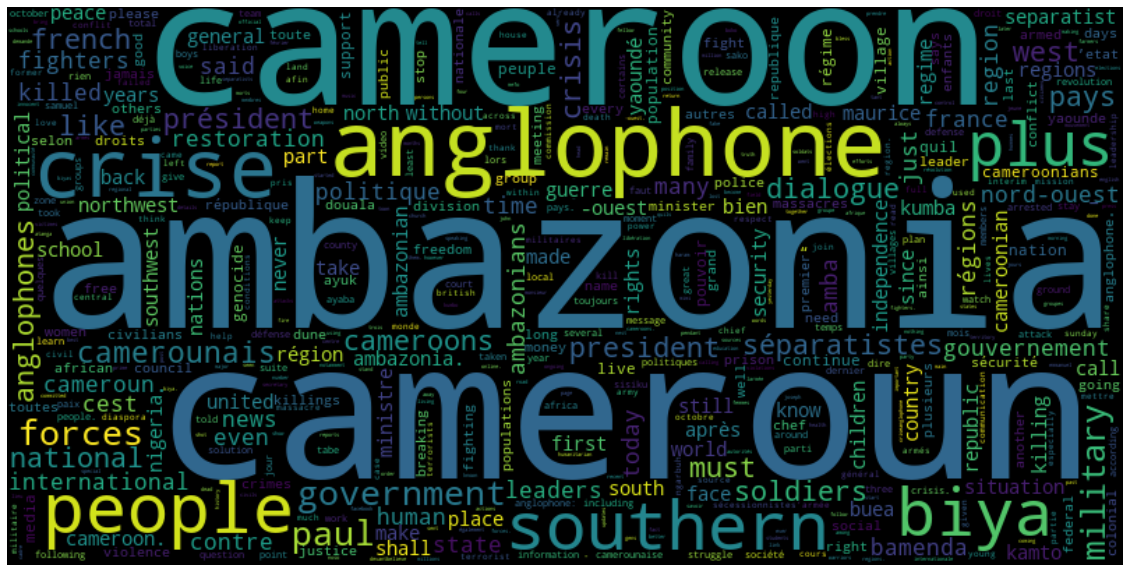

In [ ]:
Clean_words = pd.DataFrame(countsclean_word.most_common(10000),columns=['words', 'count'])
les_mots_clean = dict(zip(Clean_words['words'].tolist(), Clean_words['count'].tolist()))
wc2 = WordCloud(width=800, height=400, max_words=500).generate_from_frequencies(les_mots_clean)
plt.figure(figsize=(20, 20))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
cleaned_dataset["better_clean_Msg_words"]=comments_nsw_collwrm

In [ ]:
cleaned_dataset.head()

Page Name  \
0       CAF Commerce Africain   
1                Arreyb Media   
2                  Remy Ngono   
3  Fan Club Samuel Eto'o Fils   
4              Mimi Mefo Info   

                                             Message       Page Category  \
0  Cameroun - Décrouvrez un talent à l'état brute...        ENTREPRENEUR   
1  Scarce Warfront Video ! As election day approc...  MEDIA_NEWS_COMPANY   
2  ARRÊT SUR IMAGES Il y a exactement 35 ans, le ...           NEWS_SITE   
3  #SamuelEtoo, #ambassadeur de l'#Unicef. Résumé...            FAN_PAGE   
4  Cameroonian soldiers have dug out an Improvise...  MEDIA_NEWS_COMPANY   

  Page Admin Top Country         Page Created             Post Created  \
0                     BE  2014-12-26 19:13:25  2019-04-19 17:48:53 GMT   
1                     CM  2019-08-01 21:54:02  2020-01-12 14:41:39 GMT   
2                     FR  2014-12-21 11:55:08  2017-11-04 18:31:07 GMT   
3                     CM  2015-08-03 13:32:25  2017-03-24 23:03:04 GMT   
4                     GB  2018-07-10 22:06:06  2021-05-03 10:55:20 GMT   

  Total Interactions  Likes  Comments  Shares  Love  Wow  Haha  Sad  Angry  \
0             65,569  34701      1762   26932  1475  593    68   24     14   
1             54,404  48634       294    3679   706  248   278   83    136   
2             28,414   8293      3648   15780    88   20    24  529     32   
3             24,207  23465       378     201   146   13     3    1      0   
4             23,181  14334      1804    6164   242   79   311   85     39   

   Care                                      clean_Message  \
0     0  Cameroun Décrouvrez talent létat brute. Style ...   
1   346  Scarce Warfront Video election approcahes Inte...   
2     0  ARRÊT IMAGES exactement novembre Ahmadou AHIDJ...   
3     0  SamuelEtoo ambassadeur lUnicef. Résumé pèlerin...   
4   123  Cameroonian soldiers Improvised Explosive Devi...   

                                 clean_Message_words  \
0  [cameroun, décrouvrez, talent, létat, brute., ...   
1  [scarce, warfront, video, election, approcahes...   
2  [arrêt, images, exactement, novembre, ahmadou,...   
3  [samueletoo, ambassadeur, lunicef., résumé, pè...   
4  [cameroonian, soldiers, improvised, explosive,...   

                              better_clean_Msg_words  
0  [cameroun, décrouvrez, talent, létat, brute., ...  
1  [scarce, warfront, video, election, approcahes...  
2  [arrêt, images, exactement, novembre, ahmadou,...  
3  [samueletoo, ambassadeur, lunicef., résumé, pè...  
4  [cameroonian, soldiers, improvised, explosive,...

In [ ]:
cleaned_dataset.to_csv('endanglocrisis/FB_anglcrisis_cleaned_final.csv',sep=';',index=False)

Since Cameroon is not really a new information, we want to visualise most comon words without it, so we remove the various forms of cameroon found in the messages, and get the following.

In [ ]:
collection_words = [ 'cameroun','cameroon', 'cameroons', 'camerounais']

comments_nsw_collwrm = [[w for w in word if not w in collection_words]
                 for word in comments_nsw_collwrm]

comments_nsw_collwrm[0]

['décrouvrez',
 'talent',
 'létat',
 'brute.',
 'style',
 'jeune',
 'déplacé',
 'crise',
 'anglophone.',
 'parti',
 'nord',
 'ouest',
 'natal',
 'jeune',
 'ingénieur',
 'herbe',
 'merveilles.',
 'nhésitez',
 'contacter',
 'venir',
 'aide.',
 'loeildejtt',
 'canal',
 'international',
 'yasser',
 'trésor',
 'tanon']

In [ ]:
all_wordsclean = list(itertools.chain(*comments_nsw_collwrm))

countsclean_word = collections.Counter(all_wordsclean)

countsclean_word.most_common(20)

[('ambazonia', 18068),
 ('anglophone', 15568),
 ('crise', 11990),
 ('people', 10820),
 ('southern', 10511),
 ('biya', 9784),
 ('plus', 8600),
 ('government', 7857),
 ('forces', 7837),
 ('paul', 7825),
 ('military', 6900),
 ('pays', 5017),
 ('west', 4939),
 ('french', 4939),
 ('dialogue', 4759),
 ('president', 4627),
 ('séparatistes', 4547),
 ('must', 4533),
 ('national', 4511),
 ('soldiers', 4503)]

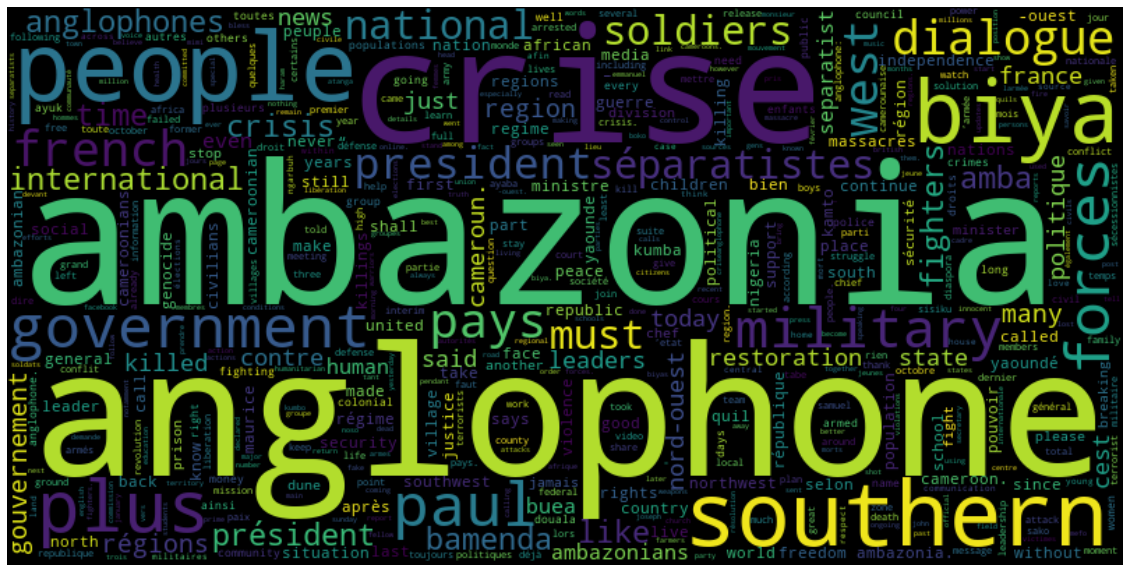

In [ ]:
Clean_words = pd.DataFrame(countsclean_word.most_common(10000),columns=['words', 'count'])
les_mots_clean = dict(zip(Clean_words['words'].tolist(), Clean_words['count'].tolist()))
wc2 = WordCloud(width=800, height=400, max_words=500).generate_from_frequencies(les_mots_clean)
plt.figure(figsize=(20, 20))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
cleaned_dataset["better_clean_Msg_words_withoutCm"]=comments_nsw_collwrm

In [ ]:
cleaned_dataset.head()

Page Name  \
0       CAF Commerce Africain   
1                Arreyb Media   
2                  Remy Ngono   
3  Fan Club Samuel Eto'o Fils   
4              Mimi Mefo Info   

                                             Message       Page Category  \
0  Cameroun - Décrouvrez un talent à l'état brute...        ENTREPRENEUR   
1  Scarce Warfront Video ! As election day approc...  MEDIA_NEWS_COMPANY   
2  ARRÊT SUR IMAGES Il y a exactement 35 ans, le ...           NEWS_SITE   
3  #SamuelEtoo, #ambassadeur de l'#Unicef. Résumé...            FAN_PAGE   
4  Cameroonian soldiers have dug out an Improvise...  MEDIA_NEWS_COMPANY   

  Page Admin Top Country         Page Created             Post Created  \
0                     BE  2014-12-26 19:13:25  2019-04-19 17:48:53 GMT   
1                     CM  2019-08-01 21:54:02  2020-01-12 14:41:39 GMT   
2                     FR  2014-12-21 11:55:08  2017-11-04 18:31:07 GMT   
3                     CM  2015-08-03 13:32:25  2017-03-24 23:03:04 GMT   
4                     GB  2018-07-10 22:06:06  2021-05-03 10:55:20 GMT   

  Total Interactions  Likes  Comments  Shares  Love  Wow  Haha  Sad  Angry  \
0             65,569  34701      1762   26932  1475  593    68   24     14   
1             54,404  48634       294    3679   706  248   278   83    136   
2             28,414   8293      3648   15780    88   20    24  529     32   
3             24,207  23465       378     201   146   13     3    1      0   
4             23,181  14334      1804    6164   242   79   311   85     39   

   Care                                      clean_Message  \
0     0  Cameroun Décrouvrez talent létat brute. Style ...   
1   346  Scarce Warfront Video election approcahes Inte...   
2     0  ARRÊT IMAGES exactement novembre Ahmadou AHIDJ...   
3     0  SamuelEtoo ambassadeur lUnicef. Résumé pèlerin...   
4   123  Cameroonian soldiers Improvised Explosive Devi...   

                                 clean_Message_words  \
0  [cameroun, décrouvrez, talent, létat, brute., ...   
1  [scarce, warfront, video, election, approcahes...   
2  [arrêt, images, exactement, novembre, ahmadou,...   
3  [samueletoo, ambassadeur, lunicef., résumé, pè...   
4  [cameroonian, soldiers, improvised, explosive,...   

                              better_clean_Msg_words  \
0  [cameroun, décrouvrez, talent, létat, brute., ...   
1  [scarce, warfront, video, election, approcahes...   
2  [arrêt, images, exactement, novembre, ahmadou,...   
3  [samueletoo, ambassadeur, lunicef., résumé, pè...   
4  [cameroonian, soldiers, improvised, explosive,...   

                    better_clean_Msg_words_withoutCm  
0  [décrouvrez, talent, létat, brute., style, jeu...  
1  [scarce, warfront, video, election, approcahes...  
2  [arrêt, images, exactement, novembre, ahmadou,...  
3  [samueletoo, ambassadeur, lunicef., résumé, pè...  
4  [cameroonian, soldiers, improvised, explosive,...

In [ ]:
cleaned_dataset.to_csv('endanglocrisis/FB_anglcrisis_cleaned_final.csv',sep=';',index=False)

## Twitter dataset

In [ ]:
data_tw = pd.read_csv("endanglocrisis/twitter_anglophone_crises_data.csv", sep=',',encoding = "UTF-8")#,on_bad_lines='skip')

C:\Users\Dev05\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data_tw.head()

Unnamed: 0                       Date             User  \
0          0  2022-11-01 10:07:44+00:00      RealBindura   
1          1  2022-10-24 17:09:47+00:00        CheBoris8   
2          2  2022-10-05 19:14:22+00:00  desmond_vintura   
3          3  2022-10-02 17:50:35+00:00  desmond_vintura   
4          4  2022-09-29 09:50:34+00:00      scitownhall   

                                               Tweet  
0  @africatechie @ChelseaFC Sad as brutal militar...  
1  Let the peace of the Lord be with us all. In t...  
2  @GermanyDiplo @ABaerbock @RauZbigniew While th...  
3  @SecBlinken That's good news for the United St...  
4       #Endanglophonecrises https://t.co/DvTYdMskqk

In [ ]:
len(data_tw)

1229557

In [ ]:
data_tw_without_nan = data_tw.dropna(subset=['Tweet'])
len(data_tw_without_nan)

358384

In [ ]:
# Cleaning the full dataset 
def tweetdata_cleaning(data):
    clean_data = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for result in executor.map(data_processing, data['Tweet']):
            print("the text cleaned is:\n", result)
            clean_data.append(result)
    data['clean_Tweet'] = clean_data
    return data

In [ ]:
cleanedtweet_dataset = tweetdata_cleaning(data_tw_without_nan)

In [ ]:
cleanedtweet_dataset.head()

Unnamed: 0                       Date             User  \
0          0  2022-11-01 10:07:44+00:00      RealBindura   
1          1  2022-10-24 17:09:47+00:00        CheBoris8   
2          2  2022-10-05 19:14:22+00:00  desmond_vintura   
3          3  2022-10-02 17:50:35+00:00  desmond_vintura   
4          4  2022-09-29 09:50:34+00:00      scitownhall   

                                               Tweet  \
0  @africatechie @ChelseaFC Sad as brutal militar...   
1  Let the peace of the Lord be with us all. In t...   
2  @GermanyDiplo @ABaerbock @RauZbigniew While th...   
3  @SecBlinken That's good news for the United St...   
4       #Endanglophonecrises https://t.co/DvTYdMskqk   

                                         clean_Tweet  
0  brutal military uses excuse "coller motif" per...  
1              peace Lord . case endanglophonecrises  
2  While thinking Ukraine also think people south...  
3  That good news United States Southern Cameroon...  
4                                Endanglophonecrises

In [ ]:
# We put all the words to lower case.
cleanedtweet_dataset['clean_Tweet_words'] = cleanedtweet_dataset['clean_Tweet'].map(lambda clean_Tweet: clean_Tweet.lower())
cleanedtweet_dataset['clean_Tweet_words'] = cleanedtweet_dataset['clean_Tweet_words'].map(lambda clean_Tweet: clean_Tweet.split())
cleanedtweet_dataset.head()

C:\Users\Dev05\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dev05\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Unnamed: 0                       Date             User  \
0          0  2022-11-01 10:07:44+00:00      RealBindura   
1          1  2022-10-24 17:09:47+00:00        CheBoris8   
2          2  2022-10-05 19:14:22+00:00  desmond_vintura   
3          3  2022-10-02 17:50:35+00:00  desmond_vintura   
4          4  2022-09-29 09:50:34+00:00      scitownhall   

                                               Tweet  \
0  @africatechie @ChelseaFC Sad as brutal militar...   
1  Let the peace of the Lord be with us all. In t...   
2  @GermanyDiplo @ABaerbock @RauZbigniew While th...   
3  @SecBlinken That's good news for the United St...   
4       #Endanglophonecrises https://t.co/DvTYdMskqk   

                                         clean_Tweet  \
0  brutal military uses excuse "coller motif" per...   
1              peace Lord . case endanglophonecrises   
2  While thinking Ukraine also think people south...   
3  That good news United States Southern Cameroon...   
4                                Endanglophonecrises   

                                   clean_Tweet_words  
0  [brutal, military, uses, excuse, "coller, moti...  
1        [peace, lord, ., case, endanglophonecrises]  
2  [while, thinking, ukraine, also, think, people...  
3  [that, good, news, united, states, southern, c...  
4                              [endanglophonecrises]

In [ ]:
cleanedtweet_dataset.to_csv('endanglocrisis/TW_anglcrisis_cleaned_final.csv',sep=';',index=False)

In [ ]:
tweets = cleanedtweet_dataset.clean_Tweet_words
tweets_nsw = [[word for word in tw_words if not word in stop_words_list + special_noisychar ]
                      for tw_words in tweets]


In [ ]:
all_words = list(itertools.chain(*tweets_nsw))

countsclean_word = collections.Counter(all_words)

countsclean_word.most_common(20)

[('freesoutherncameroons', 233589),
 ('ambazonia', 69581),
 ('genocideinsoutherncameroons', 39312),
 ('freeallarrested', 32073),
 ('cameroon', 29461),
 ('.', 27723),
 ('justicenera', 24397),
 ('stop', 21556),
 ('southerncameroons', 19613),
 ('genocide', 18178),
 ('people', 16567),
 ('cameroun', 15157),
 ('bringbackourinternet', 12363),
 ('southern', 11946),
 ('biya', 11673),
 ('freesisikuayuktabe', 11141),
 ('paulbiya', 10679),
 ('endanglophonecrises', 10287),
 ('must', 9213),
 ('world', 8978)]

In [ ]:
collection_words = [ '.','?', '"', '^^', '--']

comments_nsw_collwrm = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

comments_nsw_collwrm[0]

['brutal',
 'military',
 'uses',
 'excuse',
 '"coller',
 'motif"',
 'persecute',
 'citizens.',
 'recall',
 'students',
 'arrested',
 'phones',
 'seized',
 'content',
 'reviewed.',
 'cards',
 'takenasked',
 'release',
 'else',
 'tagged',
 '"amba"',
 'agent',
 'transferred',
 'endanglophonecrises',
 'demilitarizenwsw']

In [ ]:
all_words = list(itertools.chain(*comments_nsw_collwrm))

countsclean_word = collections.Counter(all_words)

countsclean_word.most_common(20)

[('freesoutherncameroons', 233589),
 ('ambazonia', 69581),
 ('genocideinsoutherncameroons', 39312),
 ('freeallarrested', 32073),
 ('cameroon', 29461),
 ('justicenera', 24397),
 ('stop', 21556),
 ('southerncameroons', 19613),
 ('genocide', 18178),
 ('people', 16567),
 ('cameroun', 15157),
 ('bringbackourinternet', 12363),
 ('southern', 11946),
 ('biya', 11673),
 ('freesisikuayuktabe', 11141),
 ('paulbiya', 10679),
 ('endanglophonecrises', 10287),
 ('must', 9213),
 ('world', 8978),
 ('ambazonia.', 8908)]

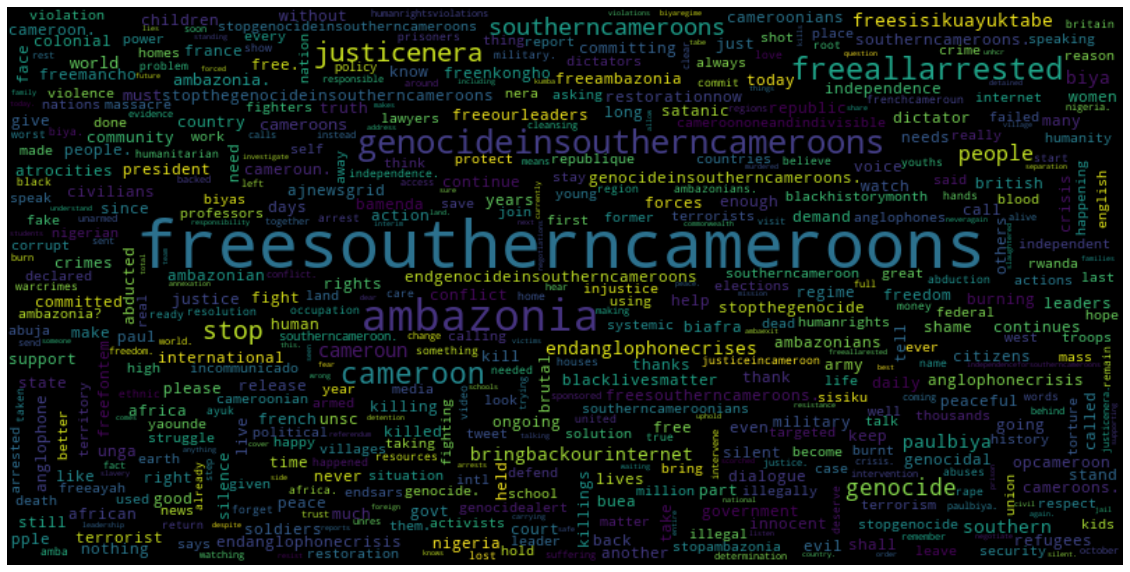

In [ ]:
Clean_words = pd.DataFrame(countsclean_word.most_common(10000),columns=['words', 'count'])
les_mots_clean = dict(zip(Clean_words['words'].tolist(), Clean_words['count'].tolist()))
wc2 = WordCloud(width=800, height=400, max_words=500).generate_from_frequencies(les_mots_clean)
plt.figure(figsize=(20, 20))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
cleanedtweet_dataset["better_clean_Tw_words"]=comments_nsw_collwrm

C:\Users\Dev05\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
cleanedtweet_dataset.head()

Unnamed: 0                       Date             User  \
0          0  2022-11-01 10:07:44+00:00      RealBindura   
1          1  2022-10-24 17:09:47+00:00        CheBoris8   
2          2  2022-10-05 19:14:22+00:00  desmond_vintura   
3          3  2022-10-02 17:50:35+00:00  desmond_vintura   
4          4  2022-09-29 09:50:34+00:00      scitownhall   

                                               Tweet  \
0  @africatechie @ChelseaFC Sad as brutal militar...   
1  Let the peace of the Lord be with us all. In t...   
2  @GermanyDiplo @ABaerbock @RauZbigniew While th...   
3  @SecBlinken That's good news for the United St...   
4       #Endanglophonecrises https://t.co/DvTYdMskqk   

                                         clean_Tweet  \
0  brutal military uses excuse "coller motif" per...   
1              peace Lord . case endanglophonecrises   
2  While thinking Ukraine also think people south...   
3  That good news United States Southern Cameroon...   
4                                Endanglophonecrises   

                                   clean_Tweet_words  \
0  [brutal, military, uses, excuse, "coller, moti...   
1        [peace, lord, ., case, endanglophonecrises]   
2  [while, thinking, ukraine, also, think, people...   
3  [that, good, news, united, states, southern, c...   
4                              [endanglophonecrises]   

                               better_clean_Tw_words  
0  [brutal, military, uses, excuse, "coller, moti...  
1           [peace, lord, case, endanglophonecrises]  
2  [thinking, ukraine, think, people, southern, c...  
3  [good, news, united, states, southern, cameroo...  
4                              [endanglophonecrises]

In [ ]:
cleanedtweet_dataset.to_csv('endanglocrisis/TW_anglcrisis_cleaned_final.csv',sep=';',index=False)

## Data from search engines

In [ ]:
data_seng = pd.read_csv("endanglocrisis/data_from_search_engines_collection_1.csv", sep=',',encoding = "UTF-8")#,on_bad_lines='skip')

In [ ]:
data_seng.head()

Unnamed: 0                                              query  \
0           0        2016 Anglophone emergency civil war regions   
1           1  2017 Anglophone emergency civil war english speak   
2           2        2016 Anglophone emergency civil war regions   
3           3        2017 Anglophone emergency civil war regions   
4           4           2018 Anglophone crisis civil war regions   

                                               title  \
0  'This is a genocide': villages burn as war rag...   
1  (Col 1) remote units | Western Sydney Universi...   
2  (PDF) The Anglophone Problem in Cameroon - Res...   
3  (PDF) The ramification of Cameroon's Anglophon...   
4  - CRISIS IN THE REPUBLIC OF CAMEROONhttps://ww...   

                                                link                  date  \
0  https://www.theguardian.com/global-development...           30 may 2018   
1  https://www.westernsydney.edu.au/future-studen...           23 feb 2017   
2  https://www.researchgate.net/publication/28641...            5 jul 2022   
3  https://www.researchgate.net/publication/35804...           24 ene 2022   
4  https://www.govinfo.gov/content/pkg/CHRG-115hh...  por R Orock  ·  2021   

                                                text  
0  b'As rebel groups combat the clampdown on angl...  
1  b'\xc2\xa0 ICS researcher Professor James Arva...  
2                                                b''  
3                                                b''  
4                                                b''

In [ ]:
len(data_seng)

920

In [ ]:
data_seng_without_nan = data_seng.dropna(subset=['text'])
len(data_seng_without_nan)

920

In [ ]:
# Cleaning the full dataset 
def search_eng_data_cleaning(data):
    clean_data = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for result in executor.map(data_processing, data['text']):
            print("the text cleaned is:\n", result)
            clean_data.append(result)
    data['clean_text'] = clean_data
    return data

In [ ]:
cleanedSeng_dataset = search_eng_data_cleaning(data_seng_without_nan)

In [ ]:
cleanedSeng_dataset.head()

Unnamed: 0                                              query  \
0           0        2016 Anglophone emergency civil war regions   
1           1  2017 Anglophone emergency civil war english speak   
2           2        2016 Anglophone emergency civil war regions   
3           3        2017 Anglophone emergency civil war regions   
4           4           2018 Anglophone crisis civil war regions   

                                               title  \
0  'This is a genocide': villages burn as war rag...   
1  (Col 1) remote units | Western Sydney Universi...   
2  (PDF) The Anglophone Problem in Cameroon - Res...   
3  (PDF) The ramification of Cameroon's Anglophon...   
4  - CRISIS IN THE REPUBLIC OF CAMEROONhttps://ww...   

                                                link                  date  \
0  https://www.theguardian.com/global-development...           30 may 2018   
1  https://www.westernsydney.edu.au/future-studen...           23 feb 2017   
2  https://www.researchgate.net/publication/28641...            5 jul 2022   
3  https://www.researchgate.net/publication/35804...           24 ene 2022   
4  https://www.govinfo.gov/content/pkg/CHRG-115hh...  por R Orock  ·  2021   

                                                text  \
0  b'As rebel groups combat the clampdown on angl...   
1  b'\xc2\xa0 ICS researcher Professor James Arva...   
2                                                b''   
3                                                b''   
4                                                b''   

                                          clean_text  
0  rebel groups combat clampdown anglophone activ...  
1  researcher Professor James Arvanitakis Kavita ...  
2                                                     
3                                                     
4

In [ ]:
# We put all the words to lower case.
cleanedSeng_dataset['clean_text_words'] = cleanedSeng_dataset['clean_text'].map(lambda clean_text: clean_text.lower())
cleanedSeng_dataset['clean_text_words'] = cleanedSeng_dataset['clean_text_words'].map(lambda clean_text: clean_text.split())
cleanedSeng_dataset.head()

Unnamed: 0                                              query  \
0           0        2016 Anglophone emergency civil war regions   
1           1  2017 Anglophone emergency civil war english speak   
2           2        2016 Anglophone emergency civil war regions   
3           3        2017 Anglophone emergency civil war regions   
4           4           2018 Anglophone crisis civil war regions   

                                               title  \
0  'This is a genocide': villages burn as war rag...   
1  (Col 1) remote units | Western Sydney Universi...   
2  (PDF) The Anglophone Problem in Cameroon - Res...   
3  (PDF) The ramification of Cameroon's Anglophon...   
4  - CRISIS IN THE REPUBLIC OF CAMEROONhttps://ww...   

                                                link                  date  \
0  https://www.theguardian.com/global-development...           30 may 2018   
1  https://www.westernsydney.edu.au/future-studen...           23 feb 2017   
2  https://www.researchgate.net/publication/28641...            5 jul 2022   
3  https://www.researchgate.net/publication/35804...           24 ene 2022   
4  https://www.govinfo.gov/content/pkg/CHRG-115hh...  por R Orock  ·  2021   

                                                text  \
0  b'As rebel groups combat the clampdown on angl...   
1  b'\xc2\xa0 ICS researcher Professor James Arva...   
2                                                b''   
3                                                b''   
4                                                b''   

                                          clean_text  \
0  rebel groups combat clampdown anglophone activ...   
1  researcher Professor James Arvanitakis Kavita ...   
2                                                      
3                                                      
4                                                      

                                    clean_text_words  
0  [rebel, groups, combat, clampdown, anglophone,...  
1  [researcher, professor, james, arvanitakis, ka...  
2                                                 []  
3                                                 []  
4                                                 []

In [ ]:
collection_words = [ '.','?', '"', '^^', '--',"\\\\",'\\']#,"\-\"]
searEng_texte = cleanedSeng_dataset.clean_text_words
searEng_texte_nsw = [[word for word in seng_words if not word in stop_words_list + special_noisychar + collection_words ]
                      for seng_words in searEng_texte]


In [ ]:
all_words = list(itertools.chain(*searEng_texte_nsw))

countsclean_word = collections.Counter(all_words)

countsclean_word.most_common(20)

[('cameroon', 9256),
 ('government', 8209),
 ('anglophone', 7937),
 ('crisis', 4272),
 ('rights', 4054),
 ('people', 3953),
 ('human', 3525),
 ('regions', 3440),
 ('international', 3426),
 ('conflict', 3286),
 ('security', 3264),
 ('group', 3209),
 ('political', 2797),
 ('separatist', 2701),
 ('forces', 2564),
 ('region', 2518),
 ('separatists', 2482),
 ('cameroonian', 2467),
 ('armed', 2371),
 ('children', 2323)]

In [ ]:
re.sub(r"\\\\+", "", 'that\\\\\\')

'that'

In [ ]:
collection_words = [ '\\\\\\','\\\\\\%', '"', '^^', '--','<:>\\']

comments_nsw_collwrm = [[re.sub(r"\\\\+", "",w) for w in word if not w in collection_words]
                 for word in searEng_texte_nsw]

comments_nsw_collwrm[0]

['rebel',
 'groups',
 'combat',
 'clampdown',
 'anglophone',
 'activists',
 'civilians',
 'caught',
 'crossfire',
 'reports',
 'many',
 'killed',
 'tens',
 'thousands',
 'forced',
 'homes',
 'hour',
 'half',
 'drive',
 'bamenda',
 'cameroon',
 'north-west',
 'belo',
 'village',
 'largely',
 'abandoned',
 'except',
 'military',
 'checkpoint',
 'manned',
 'drunken',
 'soldiers.',
 'middle',
 'road',
 'burnt',
 'motorcycle.',
 'little',
 'corpse',
 'sprawled',
 'someone',
 'tried',
 'cover',
 'handfuls',
 'grass.',
 'girls',
 'pass',
 'bags',
 'heads',
 'filled',
 'dried',
 'fish.',
 'xcwe',
 'barely',
 'food.',
 'came',
 'back',
 'collect',
 'fish',
 'explain',
 'corpse',
 'belongs',
 'villager.',
 'xcthere',
 'many',
 'bodies',
 'xcthe',
 'soldiers',
 'burned',
 'part',
 'village.',
 'belo',
 'frontline',
 'cameroon',
 'simmering',
 'conflict',
 'anglophone',
 'francophone',
 'increasingly',
 'secessionist',
 'struggle',
 'pitted',
 'french-speaking',
 'government',
 'yaound',
 'recentl

In [ ]:
all_words = list(itertools.chain(*comments_nsw_collwrm))

countsclean_word = collections.Counter(all_words)

countsclean_word.most_common(30)

[('cameroon', 9256),
 ('government', 8209),
 ('anglophone', 7937),
 ('crisis', 4272),
 ('rights', 4054),
 ('people', 3953),
 ('human', 3525),
 ('regions', 3440),
 ('international', 3426),
 ('conflict', 3286),
 ('security', 3264),
 ('group', 3209),
 ('political', 2797),
 ('separatist', 2701),
 ('forces', 2564),
 ('region', 2518),
 ('separatists', 2482),
 ('cameroonian', 2467),
 ('armed', 2371),
 ('children', 2323),
 ('national', 2318),
 ('country', 2309),
 ('women', 2298),
 ('footnote', 2242),
 ('groups', 2213),
 ('school', 2181),
 ('hide', 2180),
 ('including', 2177),
 ('military', 2129),
 ('violence', 1993)]

In [ ]:
cleanedSeng_dataset["better_clean_text_words"]=comments_nsw_collwrm
cleanedSeng_dataset.head()

Unnamed: 0                                              query  \
0           0        2016 Anglophone emergency civil war regions   
1           1  2017 Anglophone emergency civil war english speak   
2           2        2016 Anglophone emergency civil war regions   
3           3        2017 Anglophone emergency civil war regions   
4           4           2018 Anglophone crisis civil war regions   

                                               title  \
0  'This is a genocide': villages burn as war rag...   
1  (Col 1) remote units | Western Sydney Universi...   
2  (PDF) The Anglophone Problem in Cameroon - Res...   
3  (PDF) The ramification of Cameroon's Anglophon...   
4  - CRISIS IN THE REPUBLIC OF CAMEROONhttps://ww...   

                                                link                  date  \
0  https://www.theguardian.com/global-development...           30 may 2018   
1  https://www.westernsydney.edu.au/future-studen...           23 feb 2017   
2  https://www.researchgate.net/publication/28641...            5 jul 2022   
3  https://www.researchgate.net/publication/35804...           24 ene 2022   
4  https://www.govinfo.gov/content/pkg/CHRG-115hh...  por R Orock  ·  2021   

                                                text  \
0  b'As rebel groups combat the clampdown on angl...   
1  b'\xc2\xa0 ICS researcher Professor James Arva...   
2                                                b''   
3                                                b''   
4                                                b''   

                                          clean_text  \
0  rebel groups combat clampdown anglophone activ...   
1  researcher Professor James Arvanitakis Kavita ...   
2                                                      
3                                                      
4                                                      

                                    clean_text_words  \
0  [rebel, groups, combat, clampdown, anglophone,...   
1  [researcher, professor, james, arvanitakis, ka...   
2                                                 []   
3                                                 []   
4                                                 []   

                             better_clean_text_words  
0  [rebel, groups, combat, clampdown, anglophone,...  
1  [researcher, professor, james, arvanitakis, ka...  
2                                                 []  
3                                                 []  
4                                                 []

In [ ]:
new_dataframe=cleanedSeng_dataset[cleanedSeng_dataset['better_clean_text_words'].map(lambda d: len(d)) > 0]#.index, inplace=True)

In [ ]:
new_dataframe.drop('Unnamed: 0', inplace=True, axis=1)

C:\Users\Dev05\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new_dataframe = new_dataframe.reset_index()

In [ ]:
new_dataframe.drop('index', inplace=True, axis=1)

In [ ]:
new_dataframe.head()

query  \
0        2016 Anglophone emergency civil war regions   
1  2017 Anglophone emergency civil war english speak   
2        2016 Anglophone emergency civil war regions   
3  2017 Anglophone emergency civil war english speak   
4    2017 Cameroon emergency civil war english speak   

                                               title  \
0  'This is a genocide': villages burn as war rag...   
1  (Col 1) remote units | Western Sydney Universi...   
2  10/3 podcast: 29 charges in fatal Humboldt Bro...   
3  2022-04 - How language plunged Cameroon into d...   
4  5 facts about Cameroon's three crises | NRChtt...   

                                                link         date  \
0  https://www.theguardian.com/global-development...  30 may 2018   
1  https://www.westernsydney.edu.au/future-studen...  23 feb 2017   
2  https://edmontonjournal.com/news/national/10-3...   6 jul 2018   
3  https://www.wits.ac.za/news/latest-news/opinio...   1 abr 2022   
4  https://www.nrc.no/perspectives/2019/5-things-...   6 jun 2019   

                                                text  \
0  b'As rebel groups combat the clampdown on angl...   
1  b'\xc2\xa0 ICS researcher Professor James Arva...   
2  b"On Friday RCMP announced that they have laid...   
3  b'Skip navigation and go to page content \n1 A...   
4  b"The Norwegian Refugee Council (NRC) is an in...   

                                          clean_text  \
0  rebel groups combat clampdown anglophone activ...   
1  researcher Professor James Arvanitakis Kavita ...   
2  " Friday RCMP announced laid dozen charges con...   
3  bSkip navigation page content \ April Rogers O...   
4  " Norwegian Refugee Council. independent human...   

                                    clean_text_words  \
0  [rebel, groups, combat, clampdown, anglophone,...   
1  [researcher, professor, james, arvanitakis, ka...   
2  [", friday, rcmp, announced, laid, dozen, char...   
3  [bskip, navigation, page, content, \, april, r...   
4  [", norwegian, refugee, council., independent,...   

                             better_clean_text_words  
0  [rebel, groups, combat, clampdown, anglophone,...  
1  [researcher, professor, james, arvanitakis, ka...  
2  [friday, rcmp, announced, laid, dozen, charges...  
3  [bskip, navigation, page, content, april, roge...  
4  [norwegian, refugee, council., independent, hu...

In [ ]:
len(new_dataframe)

765

In [ ]:
new_dataframe.to_csv('endanglocrisis/searchEng_anglcrisis_cleaned_final.csv',sep=';',index=False)

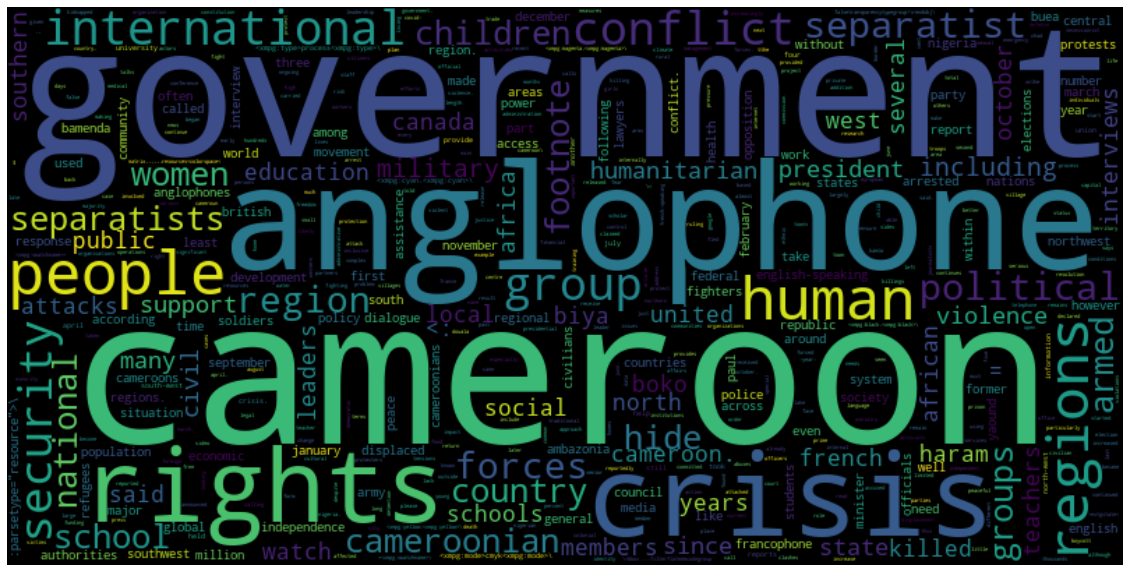

In [ ]:
Clean_words = pd.DataFrame(countsclean_word.most_common(10000),columns=['words', 'count'])
les_mots_clean = dict(zip(Clean_words['words'].tolist(), Clean_words['count'].tolist()))
wc2 = WordCloud(width=800, height=400, max_words=500).generate_from_frequencies(les_mots_clean)
plt.figure(figsize=(20, 20))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

## Betatinz_posts

In [ ]:
data_Betatinz = pd.read_csv("endanglocrisis/Betatinz_posts.csv", sep=',',encoding = "UTF-8",names=["index","title", "date", "author", "content"])#,on_bad_lines='skip')

In [ ]:
data_Betatinz.drop('index', inplace=True, axis=1)

In [ ]:
data_Betatinz.head()

title       date author  \
0  Nigerian president; Buhari, pledges support to...  14-Jul-21  ADMIN   
1  #BetaPipol this is one of the reasons why the ...  27-May-21  ADMIN   
2  “POLICE, WETI I DO YOU?” – Anglophone Cameroon...   4-Jan-21  ADMIN   
3  Free Airtime & Data for those in the North Wes...   2-Jan-21  ADMIN   
4  Are you in the NW or SW Region? This is how to...   8-Dec-20  ADMIN   

                                             content  
0  President Muhammadu Buhari has pledged the sup...  
1  On October 6th 2020, Emmanuel Nganou Djoumessi...  
2    POLICE, WETI I DO YOU?\nEARLIER TODAY (SUNDA...  
3    Beta Pipol In Solidarity for The Anglophone ...  
4  Beta Pipol In Solidarity for The Anglophone Cr...

In [ ]:
data_Betatinz["title"][0]

'Nigerian president; Buhari, pledges support to Cameroon in her fight against Ambazonia!'

In [ ]:
len(data_Betatinz)

18

In [ ]:
text=[]
for i in range(data_Betatinz.shape[0]):
    text.append(str(data_Betatinz["title"][i]) + ". " + str(data_Betatinz["content"][i]))
data_Betatinz["text"] = text
data_Betatinz.head()

title       date author  \
0  Nigerian president; Buhari, pledges support to...  14-Jul-21  ADMIN   
1  #BetaPipol this is one of the reasons why the ...  27-May-21  ADMIN   
2  “POLICE, WETI I DO YOU?” – Anglophone Cameroon...   4-Jan-21  ADMIN   
3  Free Airtime & Data for those in the North Wes...   2-Jan-21  ADMIN   
4  Are you in the NW or SW Region? This is how to...   8-Dec-20  ADMIN   

                                             content  \
0  President Muhammadu Buhari has pledged the sup...   
1  On October 6th 2020, Emmanuel Nganou Djoumessi...   
2    POLICE, WETI I DO YOU?\nEARLIER TODAY (SUNDA...   
3    Beta Pipol In Solidarity for The Anglophone ...   
4  Beta Pipol In Solidarity for The Anglophone Cr...   

                                                text  
0  Nigerian president; Buhari, pledges support to...  
1  #BetaPipol this is one of the reasons why the ...  
2  “POLICE, WETI I DO YOU?” – Anglophone Cameroon...  
3  Free Airtime & Data for those in the North Wes...  
4  Are you in the NW or SW Region? This is how to...

In [ ]:
# Cleaning the full dataset 
def Betatinz_data_cleaning(data):
    clean_data = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for result in executor.map(data_processing, data['text']):
            print("the text cleaned is:\n", result)
            clean_data.append(result)
    data['clean_text'] = clean_data
    return data

In [ ]:
data_Betatinz_without_nan = data_Betatinz.dropna(subset=['text'])
len(data_Betatinz_without_nan)

18

In [ ]:
cleanedBetatinz_dataset = Betatinz_data_cleaning(data_Betatinz_without_nan)

In [ ]:
# We put all the words to lower case.
cleanedBetatinz_dataset['clean_text_words'] = cleanedBetatinz_dataset['clean_text'].map(lambda clean_text: clean_text.lower())
cleanedBetatinz_dataset['clean_text_words'] = cleanedBetatinz_dataset['clean_text_words'].map(lambda clean_text: clean_text.split())
cleanedBetatinz_dataset.head()

title       date author  \
0  Nigerian president; Buhari, pledges support to...  14-Jul-21  ADMIN   
1  #BetaPipol this is one of the reasons why the ...  27-May-21  ADMIN   
2  “POLICE, WETI I DO YOU?” – Anglophone Cameroon...   4-Jan-21  ADMIN   
3  Free Airtime & Data for those in the North Wes...   2-Jan-21  ADMIN   
4  Are you in the NW or SW Region? This is how to...   8-Dec-20  ADMIN   

                                             content  \
0  President Muhammadu Buhari has pledged the sup...   
1  On October 6th 2020, Emmanuel Nganou Djoumessi...   
2    POLICE, WETI I DO YOU?\nEARLIER TODAY (SUNDA...   
3    Beta Pipol In Solidarity for The Anglophone ...   
4  Beta Pipol In Solidarity for The Anglophone Cr...   

                                                text  \
0  Nigerian president; Buhari, pledges support to...   
1  #BetaPipol this is one of the reasons why the ...   
2  “POLICE, WETI I DO YOU?” – Anglophone Cameroon...   
3  Free Airtime & Data for those in the North Wes...   
4  Are you in the NW or SW Region? This is how to...   

                                          clean_text  \
0  Nigerian president Buhari pledges support Came...   
1  BetaPipol reasons construction “ring road proj...   
2  “POLICE WETI ?” – Anglophone Cameroonian cries...   
3  Free Airtime Data North West South West Region...   
4  Region? This benefit free calls free data. Bet...   

                                    clean_text_words  
0  [nigerian, president, buhari, pledges, support...  
1  [betapipol, reasons, construction, “ring, road...  
2  [“police, weti, ?”, –, anglophone, cameroonian...  
3  [free, airtime, data, north, west, south, west...  
4  [region?, this, benefit, free, calls, free, da...

In [ ]:
collection_words = [ '.','?', '"', '^^', '--',"\\\\",'\\','“']#,"\-\"]
Betatinz_texte = cleanedBetatinz_dataset.clean_text_words
Betatinz_texte_nsw = [[word for word in seng_words if not word in stop_words_list + special_noisychar + collection_words ]
                      for seng_words in Betatinz_texte]

In [ ]:
all_words = list(itertools.chain(*Betatinz_texte_nsw))

countsclean_word = collections.Counter(all_words)

countsclean_word.most_common(20)

[('make', 19),
 ('boys', 19),
 ('amba', 18),
 ('money', 16),
 ('cameroon', 14),
 ('west', 14),
 ('president', 12),
 ('orange', 12),
 ('said', 11),
 ('beta', 11),
 ('betapipol', 10),
 ('laptop', 10),
 ('police', 9),
 ('asked', 9),
 ('free', 9),
 ('north', 8),
 ('like', 8),
 ('regions', 8),
 ('kumba', 8),
 ('school', 8)]

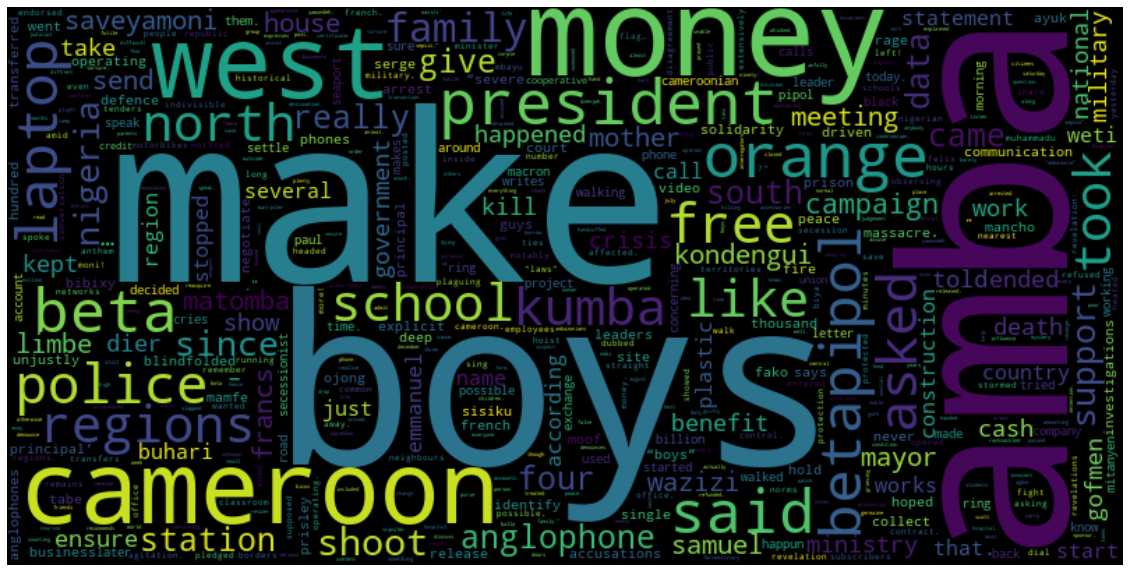

In [ ]:
Clean_words = pd.DataFrame(countsclean_word.most_common(10000),columns=['words', 'count'])
les_mots_clean = dict(zip(Clean_words['words'].tolist(), Clean_words['count'].tolist()))
wc2 = WordCloud(width=800, height=400, max_words=500).generate_from_frequencies(les_mots_clean)
plt.figure(figsize=(20, 20))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
cleanedBetatinz_dataset["better_clean_text_words"]=Betatinz_texte_nsw
cleanedBetatinz_dataset.head()

title       date author  \
0  Nigerian president; Buhari, pledges support to...  14-Jul-21  ADMIN   
1  #BetaPipol this is one of the reasons why the ...  27-May-21  ADMIN   
2  “POLICE, WETI I DO YOU?” – Anglophone Cameroon...   4-Jan-21  ADMIN   
3  Free Airtime & Data for those in the North Wes...   2-Jan-21  ADMIN   
4  Are you in the NW or SW Region? This is how to...   8-Dec-20  ADMIN   

                                             content  \
0  President Muhammadu Buhari has pledged the sup...   
1  On October 6th 2020, Emmanuel Nganou Djoumessi...   
2    POLICE, WETI I DO YOU?\nEARLIER TODAY (SUNDA...   
3    Beta Pipol In Solidarity for The Anglophone ...   
4  Beta Pipol In Solidarity for The Anglophone Cr...   

                                                text  \
0  Nigerian president; Buhari, pledges support to...   
1  #BetaPipol this is one of the reasons why the ...   
2  “POLICE, WETI I DO YOU?” – Anglophone Cameroon...   
3  Free Airtime & Data for those in the North Wes...   
4  Are you in the NW or SW Region? This is how to...   

                                          clean_text  \
0  Nigerian president Buhari pledges support Came...   
1  BetaPipol reasons construction “ring road proj...   
2  “POLICE WETI ?” – Anglophone Cameroonian cries...   
3  Free Airtime Data North West South West Region...   
4  Region? This benefit free calls free data. Bet...   

                                    clean_text_words  \
0  [nigerian, president, buhari, pledges, support...   
1  [betapipol, reasons, construction, “ring, road...   
2  [“police, weti, ?”, –, anglophone, cameroonian...   
3  [free, airtime, data, north, west, south, west...   
4  [region?, this, benefit, free, calls, free, da...   

                             better_clean_text_words  
0  [nigerian, president, buhari, pledges, support...  
1  [betapipol, reasons, construction, “ring, road...  
2  [“police, weti, ?”, –, anglophone, cameroonian...  
3  [free, airtime, data, north, west, south, west...  
4  [region?, benefit, free, calls, free, data., b...

In [ ]:
cleanedBetatinz_dataset.to_csv('endanglocrisis/Betatinz_anglcrisis_cleaned_final.csv',sep=';',index=False)

## Mimi mefo_posts

In [ ]:
data_Mimimefo1 = pd.read_csv("endanglocrisis/Mimi mefo_posts.csv", sep=',',encoding = "UTF-8",names=["index","title", "date", "author", "text"])#,on_bad_lines='skip')
data_Mimimefo2 = pd.read_csv("endanglocrisis/Mimi mefo_posts1.csv", sep=',',encoding = "UTF-8",names=["index","title", "date", "author", "text"])#,on_bad_lines='skip')

In [ ]:
data_Mimimefo1.head()

index                                              title           date  \
0      0  Barrister Tamfu Richard To Sue Moja Moja Over ...  July 10, 2022   
1      0  Soldier tells ‘General’ No Pity ‘Your Days Are...   July 8, 2022   
2      0  Breaking! Amba fighters invade University of B...   July 8, 2022   
3      0  Breaking! One dead in Amba attack on Mbiame Br...   July 8, 2022   
4      0  Anglophone Crisis: 11 Separatists Captured In ...  June 28, 2022   

                  author                                               text  
0  by Mimi Mefo Takambou  Human Rights Lawyer and Peace Crusader, Barris...  
1  by Mimi Mefo Takambou  A soldier has warned notorious Amba ‘General’ ...  
2  by Mimi Mefo Takambou  Ambazonian fighters today Friday July 8, invad...  
3      by Mimi Mefo Info  Ambazonian fighters have attacked the Mbiame B...  
4      by Mimi Mefo Info  By M.K\nAt least 11 separatist fighters have b...

In [ ]:
data_Mimimefo2.head()

index                                              title  \
0      0  Bangem: Students ‘take cover’ under benches as...   
1      0  Anglophone Crisis: Government Forces Rape, Exe...   
2      0  Boyo: Military burn twelve houses, five bikes,...   
3      0       Pinyin: Two brothers killed in military raid   
4      0  Buea: Private car shattered, owner in critical...   

                 date                 author  \
0    November 8, 2022  by Mimi Mefo Takambou   
1    October 21, 2022  by Mimi Mefo Takambou   
2    October 12, 2022  by Mimi Mefo Takambou   
3  September 30, 2022      by Mimi Mefo Info   
4   September 7, 2022  by Mimi Mefo Takambou   

                                                text  
0  Residents and Students of a public school in B...  
1  By Soulemanu Buba\nAnger has filled the hearts...  
2  By David Atangana\nAtleast twelve houses have ...  
3  Two young men whose names MMI got as Ticha and...  
4  By David Atangana\nA private car has been shat...

### We combine the two

In [ ]:
frames = [data_Mimimefo1, data_Mimimefo2]
  
data_Mimimefo = pd.concat(frames)
data_Mimimefo.head()

index                                              title           date  \
0      0  Barrister Tamfu Richard To Sue Moja Moja Over ...  July 10, 2022   
1      0  Soldier tells ‘General’ No Pity ‘Your Days Are...   July 8, 2022   
2      0  Breaking! Amba fighters invade University of B...   July 8, 2022   
3      0  Breaking! One dead in Amba attack on Mbiame Br...   July 8, 2022   
4      0  Anglophone Crisis: 11 Separatists Captured In ...  June 28, 2022   

                  author                                               text  
0  by Mimi Mefo Takambou  Human Rights Lawyer and Peace Crusader, Barris...  
1  by Mimi Mefo Takambou  A soldier has warned notorious Amba ‘General’ ...  
2  by Mimi Mefo Takambou  Ambazonian fighters today Friday July 8, invad...  
3      by Mimi Mefo Info  Ambazonian fighters have attacked the Mbiame B...  
4      by Mimi Mefo Info  By M.K\nAt least 11 separatist fighters have b...

In [ ]:
len(data_Mimimefo1),len(data_Mimimefo2),len(data_Mimimefo)

(149, 140, 289)

In [ ]:
data_Mimimefo = data_Mimimefo.reset_index()

In [ ]:
data_Mimimefo.drop('index', inplace=True, axis=1)
data_Mimimefo.head()

title           date  \
0  Barrister Tamfu Richard To Sue Moja Moja Over ...  July 10, 2022   
1  Soldier tells ‘General’ No Pity ‘Your Days Are...   July 8, 2022   
2  Breaking! Amba fighters invade University of B...   July 8, 2022   
3  Breaking! One dead in Amba attack on Mbiame Br...   July 8, 2022   
4  Anglophone Crisis: 11 Separatists Captured In ...  June 28, 2022   

                  author                                               text  \
0  by Mimi Mefo Takambou  Human Rights Lawyer and Peace Crusader, Barris...   
1  by Mimi Mefo Takambou  A soldier has warned notorious Amba ‘General’ ...   
2  by Mimi Mefo Takambou  Ambazonian fighters today Friday July 8, invad...   
3      by Mimi Mefo Info  Ambazonian fighters have attacked the Mbiame B...   
4      by Mimi Mefo Info  By M.K\nAt least 11 separatist fighters have b...   

                                          total_text  
0  Barrister Tamfu Richard To Sue Moja Moja Over ...  
1  Soldier tells ‘General’ No Pity ‘Your Days Are...  
2  Breaking! Amba fighters invade University of B...  
3  Breaking! One dead in Amba attack on Mbiame Br...  
4  Anglophone Crisis: 11 Separatists Captured In ...

In [ ]:
text=[]
for i in range(data_Mimimefo.shape[0]):
    text.append(str(data_Mimimefo["title"][i]) + ". " + str(data_Mimimefo["text"][i]))
data_Mimimefo["total_text"] = text
data_Mimimefo.head()

index                                              title           date  \
0      0  Barrister Tamfu Richard To Sue Moja Moja Over ...  July 10, 2022   
1      1  Soldier tells ‘General’ No Pity ‘Your Days Are...   July 8, 2022   
2      2  Breaking! Amba fighters invade University of B...   July 8, 2022   
3      3  Breaking! One dead in Amba attack on Mbiame Br...   July 8, 2022   
4      4  Anglophone Crisis: 11 Separatists Captured In ...  June 28, 2022   

                  author                                               text  \
0  by Mimi Mefo Takambou  Human Rights Lawyer and Peace Crusader, Barris...   
1  by Mimi Mefo Takambou  A soldier has warned notorious Amba ‘General’ ...   
2  by Mimi Mefo Takambou  Ambazonian fighters today Friday July 8, invad...   
3      by Mimi Mefo Info  Ambazonian fighters have attacked the Mbiame B...   
4      by Mimi Mefo Info  By M.K\nAt least 11 separatist fighters have b...   

                                          total_text  
0  Barrister Tamfu Richard To Sue Moja Moja Over ...  
1  Soldier tells ‘General’ No Pity ‘Your Days Are...  
2  Breaking! Amba fighters invade University of B...  
3  Breaking! One dead in Amba attack on Mbiame Br...  
4  Anglophone Crisis: 11 Separatists Captured In ...

In [ ]:
# Cleaning the full dataset 
def Mimimefo_data_cleaning(data):
    clean_data = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for result in executor.map(data_processing, data['total_text']):
            print("the text cleaned is:\n", result)
            clean_data.append(result)
    data['clean_text'] = clean_data
    return data

In [ ]:
data_Mimimefo_without_nan = data_Mimimefo.dropna(subset=['text'])
len(data_Mimimefo_without_nan)

289

In [ ]:
cleanedMimimefo_dataset = Mimimefo_data_cleaning(data_Mimimefo_without_nan)

In [ ]:
# We put all the words to lower case.
cleanedMimimefo_dataset['clean_text_words'] = cleanedMimimefo_dataset['clean_text'].map(lambda clean_text: clean_text.lower())
cleanedMimimefo_dataset['clean_text_words'] = cleanedMimimefo_dataset['clean_text_words'].map(lambda clean_text: clean_text.split())
cleanedMimimefo_dataset.head()

title           date  \
0  Barrister Tamfu Richard To Sue Moja Moja Over ...  July 10, 2022   
1  Soldier tells ‘General’ No Pity ‘Your Days Are...   July 8, 2022   
2  Breaking! Amba fighters invade University of B...   July 8, 2022   
3  Breaking! One dead in Amba attack on Mbiame Br...   July 8, 2022   
4  Anglophone Crisis: 11 Separatists Captured In ...  June 28, 2022   

                  author                                               text  \
0  by Mimi Mefo Takambou  Human Rights Lawyer and Peace Crusader, Barris...   
1  by Mimi Mefo Takambou  A soldier has warned notorious Amba ‘General’ ...   
2  by Mimi Mefo Takambou  Ambazonian fighters today Friday July 8, invad...   
3      by Mimi Mefo Info  Ambazonian fighters have attacked the Mbiame B...   
4      by Mimi Mefo Info  By M.K\nAt least 11 separatist fighters have b...   

                                          total_text  \
0  Barrister Tamfu Richard To Sue Moja Moja Over ...   
1  Soldier tells ‘General’ No Pity ‘Your Days Are...   
2  Breaking! Amba fighters invade University of B...   
3  Breaking! One dead in Amba attack on Mbiame Br...   
4  Anglophone Crisis: 11 Separatists Captured In ...   

                                          clean_text  \
0  Barrister Tamfu Richard Moja Moja Over Human R...   
1  Soldier tells ‘General’ Pity ‘Your Days Number...   
2  Breaking! Amba fighters invade University Buea...   
3  Breaking! dead Amba attack Mbiame Brigade. Amb...   
4  Anglophone Crisis: Separatists Captured Babadj...   

                                    clean_text_words  
0  [barrister, tamfu, richard, moja, moja, over, ...  
1  [soldier, tells, ‘general’, pity, ‘your, days,...  
2  [breaking!, amba, fighters, invade, university...  
3  [breaking!, dead, amba, attack, mbiame, brigad...  
4  [anglophone, crisis:, separatists, captured, b...

In [ ]:
collection_words = [ '.','?', '"', '^^', '--',"\\\\",'\\','“']#,"\-\"]
Mimimefo_texte = cleanedMimimefo_dataset.clean_text_words
Mimimefo_texte_nsw = [[word for word in m_words if not word in stop_words_list + special_noisychar + collection_words ]
                      for m_words in Mimimefo_texte]

In [ ]:
all_words = list(itertools.chain(*Mimimefo_texte_nsw))

countsclean_word = collections.Counter(all_words)

countsclean_word.most_common(20)

[('west', 443),
 ('support', 406),
 ('fighters', 400),
 ('cameroon', 379),
 ('work', 355),
 ('ambazonia', 350),
 ('government', 343),
 ('link', 332),
 ('said', 303),
 ('people', 302),
 ('help', 298),
 ('anglophone', 294),
 ('military', 293),
 ('north', 263),
 ('mimi', 262),
 ('mefo', 262),
 ('ambazonian', 239),
 ('separatist', 239),
 ('info', 223),
 ('south', 188)]

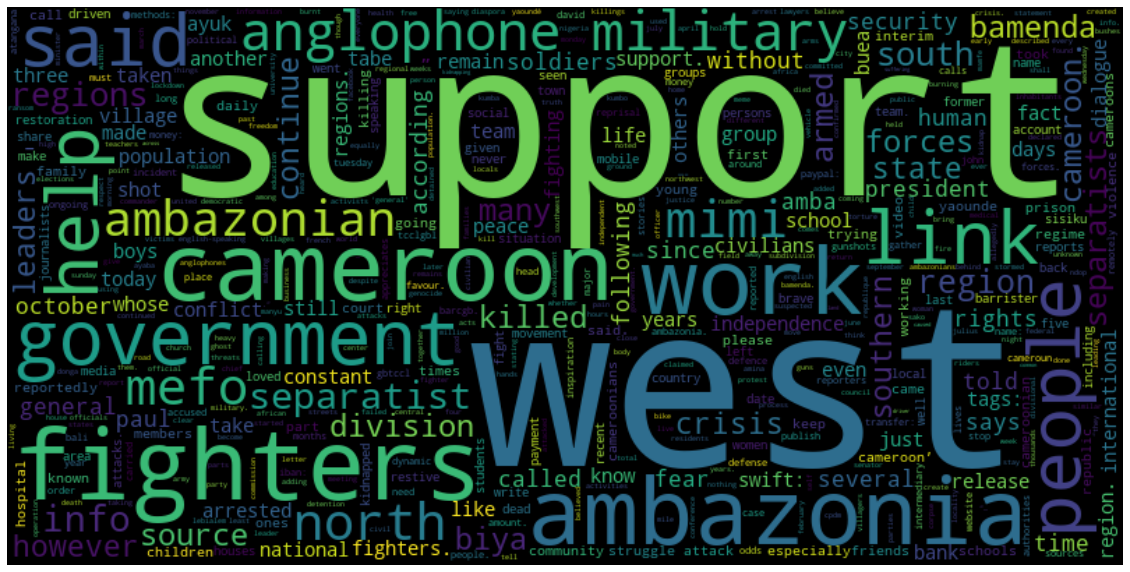

In [ ]:
Clean_words = pd.DataFrame(countsclean_word.most_common(10000),columns=['words', 'count'])
les_mots_clean = dict(zip(Clean_words['words'].tolist(), Clean_words['count'].tolist()))
wc2 = WordCloud(width=800, height=400, max_words=500).generate_from_frequencies(les_mots_clean)
plt.figure(figsize=(20, 20))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
cleanedMimimefo_dataset["better_clean_text_words"]=Mimimefo_texte_nsw
cleanedMimimefo_dataset.head()

title           date  \
0  Barrister Tamfu Richard To Sue Moja Moja Over ...  July 10, 2022   
1  Soldier tells ‘General’ No Pity ‘Your Days Are...   July 8, 2022   
2  Breaking! Amba fighters invade University of B...   July 8, 2022   
3  Breaking! One dead in Amba attack on Mbiame Br...   July 8, 2022   
4  Anglophone Crisis: 11 Separatists Captured In ...  June 28, 2022   

                  author                                               text  \
0  by Mimi Mefo Takambou  Human Rights Lawyer and Peace Crusader, Barris...   
1  by Mimi Mefo Takambou  A soldier has warned notorious Amba ‘General’ ...   
2  by Mimi Mefo Takambou  Ambazonian fighters today Friday July 8, invad...   
3      by Mimi Mefo Info  Ambazonian fighters have attacked the Mbiame B...   
4      by Mimi Mefo Info  By M.K\nAt least 11 separatist fighters have b...   

                                          total_text  \
0  Barrister Tamfu Richard To Sue Moja Moja Over ...   
1  Soldier tells ‘General’ No Pity ‘Your Days Are...   
2  Breaking! Amba fighters invade University of B...   
3  Breaking! One dead in Amba attack on Mbiame Br...   
4  Anglophone Crisis: 11 Separatists Captured In ...   

                                          clean_text  \
0  Barrister Tamfu Richard Moja Moja Over Human R...   
1  Soldier tells ‘General’ Pity ‘Your Days Number...   
2  Breaking! Amba fighters invade University Buea...   
3  Breaking! dead Amba attack Mbiame Brigade. Amb...   
4  Anglophone Crisis: Separatists Captured Babadj...   

                                    clean_text_words  \
0  [barrister, tamfu, richard, moja, moja, over, ...   
1  [soldier, tells, ‘general’, pity, ‘your, days,...   
2  [breaking!, amba, fighters, invade, university...   
3  [breaking!, dead, amba, attack, mbiame, brigad...   
4  [anglophone, crisis:, separatists, captured, b...   

                             better_clean_text_words  
0  [barrister, tamfu, richard, human, rights, abu...  
1  [soldier, tells, ‘general’, pity, ‘your, days,...  
2  [breaking!, amba, fighters, invade, university...  
3  [breaking!, dead, amba, attack, mbiame, brigad...  
4  [anglophone, crisis:, separatists, captured, b...

In [ ]:
cleanedMimimefo_dataset.to_csv('endanglocrisis/Mimimefo_anglcrisis_cleaned_final.csv',sep=';',index=False)

## crtv_articles

In [ ]:
data_crtv_articles = pd.read_csv("endanglocrisis/ang_crisis_crtv_articles_eng.csv", sep=',',encoding = "UTF-8")
data_crtv_articles.head()

art_date                                           art_text  art_time  \
0  2018-08-22  News Société \nAnglophone Crisis: University o...  11:40:29   
1  2018-07-26  News Politique \nAnglophone crisis: Men of God...  19:23:53   
2  2018-06-08  News Sport \nAnglophone Crisis: Ace striker Sa...  13:27:24   
3  2018-01-30  Culture / Communication News Politique \nAnglo...  11:09:31   
4  2018-01-29  Economie News \nThe anglophone Crisis : 47 sus...  10:50:56   

                                           art_title  \
0  Anglophone Crisis: University of Maroua coughs...   
1  Anglophone crisis: Men of God opt to spearhead...   
2  Anglophone Crisis: Ace striker Samuel engages ...   
3  Anglophone Crisis: Mincom confirms extradition...   
4  The anglophone Crisis : 47 suspects including ...   

                                            art_link  
0  https://www.crtv.cm/2018/08/anglophone-crisis-...  
1  https://www.crtv.cm/2018/07/anglophone-crisis-...  
2  https://www.crtv.cm/2018/06/anglophone-crisis-...  
3  https://www.crtv.cm/2018/01/anglophone-crisis-...  
4  https://www.crtv.cm/2018/01/anglophone-crisis4...

In [ ]:
text=[]
for i in range(data_crtv_articles.shape[0]):
    text.append(str(data_crtv_articles["art_title"][i]) + ". " + str(data_crtv_articles["art_text"][i]))
data_crtv_articles["text"] = text
data_crtv_articles.head()

art_date                                           art_text  art_time  \
0  2018-08-22  News Société \nAnglophone Crisis: University o...  11:40:29   
1  2018-07-26  News Politique \nAnglophone crisis: Men of God...  19:23:53   
2  2018-06-08  News Sport \nAnglophone Crisis: Ace striker Sa...  13:27:24   
3  2018-01-30  Culture / Communication News Politique \nAnglo...  11:09:31   
4  2018-01-29  Economie News \nThe anglophone Crisis : 47 sus...  10:50:56   

                                           art_title  \
0  Anglophone Crisis: University of Maroua coughs...   
1  Anglophone crisis: Men of God opt to spearhead...   
2  Anglophone Crisis: Ace striker Samuel engages ...   
3  Anglophone Crisis: Mincom confirms extradition...   
4  The anglophone Crisis : 47 suspects including ...   

                                            art_link  \
0  https://www.crtv.cm/2018/08/anglophone-crisis-...   
1  https://www.crtv.cm/2018/07/anglophone-crisis-...   
2  https://www.crtv.cm/2018/06/anglophone-crisis-...   
3  https://www.crtv.cm/2018/01/anglophone-crisis-...   
4  https://www.crtv.cm/2018/01/anglophone-crisis4...   

                                                text  
0  Anglophone Crisis: University of Maroua coughs...  
1  Anglophone crisis: Men of God opt to spearhead...  
2  Anglophone Crisis: Ace striker Samuel engages ...  
3  Anglophone Crisis: Mincom confirms extradition...  
4  The anglophone Crisis : 47 suspects including ...

In [ ]:
len(data_crtv_articles)

10

In [ ]:
data_crtv_articles_without_nan = data_crtv_articles.dropna(subset=['text'])
len(data_crtv_articles_without_nan)

10

In [ ]:
# Cleaning the full dataset 
def crtv_article_data_cleaning(data):
    clean_data = []

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for result in executor.map(data_processing, data['text']):
            print("the text cleaned is:\n", result)
            clean_data.append(result)
    data['clean_text'] = clean_data
    return data

In [ ]:
cleanedcrtv_articles_dataset = crtv_article_data_cleaning(data_crtv_articles_without_nan)

In [ ]:
# We put all the words to lower case.
cleanedcrtv_articles_dataset['clean_text_words'] = cleanedcrtv_articles_dataset['clean_text'].map(lambda clean_text: clean_text.lower())
cleanedcrtv_articles_dataset['clean_text_words'] = cleanedcrtv_articles_dataset['clean_text_words'].map(lambda clean_text: clean_text.split())
cleanedcrtv_articles_dataset.head()

art_date                                           art_text  art_time  \
0  2018-08-22  News Société \nAnglophone Crisis: University o...  11:40:29   
1  2018-07-26  News Politique \nAnglophone crisis: Men of God...  19:23:53   
2  2018-06-08  News Sport \nAnglophone Crisis: Ace striker Sa...  13:27:24   
3  2018-01-30  Culture / Communication News Politique \nAnglo...  11:09:31   
4  2018-01-29  Economie News \nThe anglophone Crisis : 47 sus...  10:50:56   

                                           art_title  \
0  Anglophone Crisis: University of Maroua coughs...   
1  Anglophone crisis: Men of God opt to spearhead...   
2  Anglophone Crisis: Ace striker Samuel engages ...   
3  Anglophone Crisis: Mincom confirms extradition...   
4  The anglophone Crisis : 47 suspects including ...   

                                            art_link  \
0  https://www.crtv.cm/2018/08/anglophone-crisis-...   
1  https://www.crtv.cm/2018/07/anglophone-crisis-...   
2  https://www.crtv.cm/2018/06/anglophone-crisis-...   
3  https://www.crtv.cm/2018/01/anglophone-crisis-...   
4  https://www.crtv.cm/2018/01/anglophone-crisis4...   

                                                text  \
0  Anglophone Crisis: University of Maroua coughs...   
1  Anglophone crisis: Men of God opt to spearhead...   
2  Anglophone Crisis: Ace striker Samuel engages ...   
3  Anglophone Crisis: Mincom confirms extradition...   
4  The anglophone Crisis : 47 suspects including ...   

                                          clean_text  \
0  Anglophone Crisis: University Maroua coughs FC...   
1  Anglophone crisis: spearhead peace talk. News ...   
2  Anglophone Crisis: striker Samuel engages peac...   
3  Anglophone Crisis: Mincom confirms extradition...   
4  anglophone Crisis suspects including Ayuk Tabe...   

                                    clean_text_words  
0  [anglophone, crisis:, university, maroua, coug...  
1  [anglophone, crisis:, spearhead, peace, talk.,...  
2  [anglophone, crisis:, striker, samuel, engages...  
3  [anglophone, crisis:, mincom, confirms, extrad...  
4  [anglophone, crisis, suspects, including, ayuk...

In [ ]:
collection_words = [ '.','?', '"', '^^', '--',"\\\\",'\\','“']
crtv_articles_texte = cleanedcrtv_articles_dataset.clean_text_words
crtv_articles_texte_nsw = [[word for word in c_words if not word in stop_words_list + special_noisychar + collection_words ]
                      for c_words in crtv_articles_texte]

In [ ]:
all_words = list(itertools.chain(*crtv_articles_texte_nsw))

countsclean_word = collections.Counter(all_words)

countsclean_word.most_common(20)

[('anglophone', 27),
 ('minister', 25),
 ('peace', 21),
 ('west', 20),
 ('crisis:', 19),
 ('prime', 18),
 ('regions', 17),
 ('president', 13),
 ('cameroon', 13),
 ('head', 13),
 ('people', 12),
 ('views', 11),
 ('north', 11),
 ('comments', 10),
 ('whatsapp', 10),
 ('facebook', 10),
 ('twitter', 10),
 ('partager', 10),
 ('dialogue', 10),
 ('south', 10)]

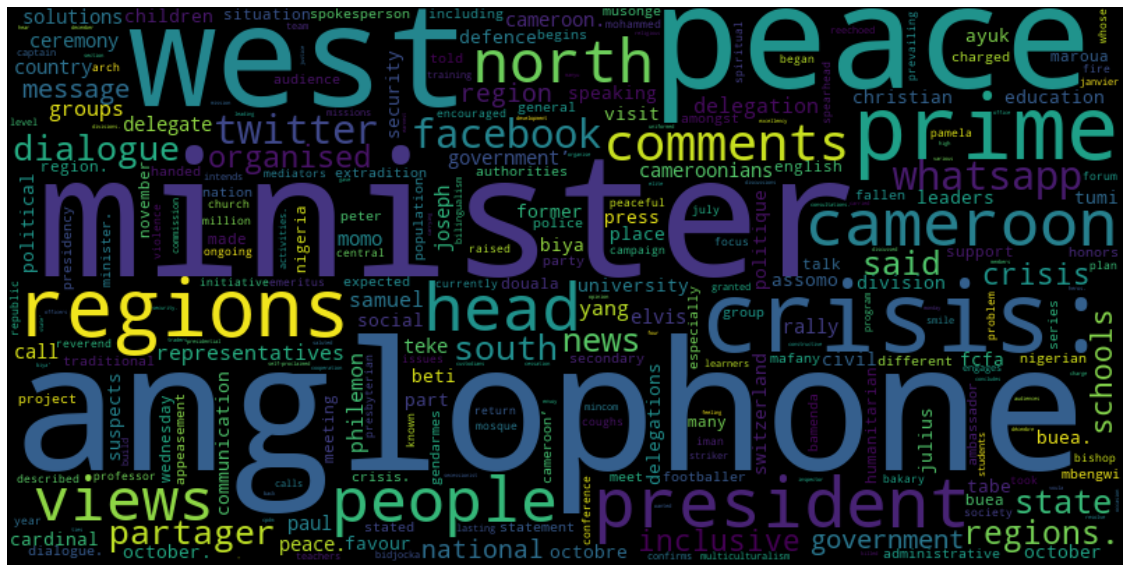

In [ ]:
Clean_words = pd.DataFrame(countsclean_word.most_common(10000),columns=['words', 'count'])
les_mots_clean = dict(zip(Clean_words['words'].tolist(), Clean_words['count'].tolist()))
wc2 = WordCloud(width=800, height=400, max_words=500).generate_from_frequencies(les_mots_clean)
plt.figure(figsize=(20, 20))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
cleanedcrtv_articles_dataset["better_clean_text_words"]=crtv_articles_texte_nsw
cleanedcrtv_articles_dataset.head()

art_date                                           art_text  art_time  \
0  2018-08-22  News Société \nAnglophone Crisis: University o...  11:40:29   
1  2018-07-26  News Politique \nAnglophone crisis: Men of God...  19:23:53   
2  2018-06-08  News Sport \nAnglophone Crisis: Ace striker Sa...  13:27:24   
3  2018-01-30  Culture / Communication News Politique \nAnglo...  11:09:31   
4  2018-01-29  Economie News \nThe anglophone Crisis : 47 sus...  10:50:56   

                                           art_title  \
0  Anglophone Crisis: University of Maroua coughs...   
1  Anglophone crisis: Men of God opt to spearhead...   
2  Anglophone Crisis: Ace striker Samuel engages ...   
3  Anglophone Crisis: Mincom confirms extradition...   
4  The anglophone Crisis : 47 suspects including ...   

                                            art_link  \
0  https://www.crtv.cm/2018/08/anglophone-crisis-...   
1  https://www.crtv.cm/2018/07/anglophone-crisis-...   
2  https://www.crtv.cm/2018/06/anglophone-crisis-...   
3  https://www.crtv.cm/2018/01/anglophone-crisis-...   
4  https://www.crtv.cm/2018/01/anglophone-crisis4...   

                                                text  \
0  Anglophone Crisis: University of Maroua coughs...   
1  Anglophone crisis: Men of God opt to spearhead...   
2  Anglophone Crisis: Ace striker Samuel engages ...   
3  Anglophone Crisis: Mincom confirms extradition...   
4  The anglophone Crisis : 47 suspects including ...   

                                          clean_text  \
0  Anglophone Crisis: University Maroua coughs FC...   
1  Anglophone crisis: spearhead peace talk. News ...   
2  Anglophone Crisis: striker Samuel engages peac...   
3  Anglophone Crisis: Mincom confirms extradition...   
4  anglophone Crisis suspects including Ayuk Tabe...   

                                    clean_text_words  \
0  [anglophone, crisis:, university, maroua, coug...   
1  [anglophone, crisis:, spearhead, peace, talk.,...   
2  [anglophone, crisis:, striker, samuel, engages...   
3  [anglophone, crisis:, mincom, confirms, extrad...   
4  [anglophone, crisis, suspects, including, ayuk...   

                             better_clean_text_words  
0  [anglophone, crisis:, university, maroua, coug...  
1  [anglophone, crisis:, spearhead, peace, talk.,...  
2  [anglophone, crisis:, striker, samuel, engages...  
3  [anglophone, crisis:, mincom, confirms, extrad...  
4  [anglophone, crisis, suspects, including, ayuk...

In [ ]:
cleanedcrtv_articles_dataset.to_csv('endanglocrisis/crtv_articles_anglcrisis_cleaned_final.csv',sep=';',index=False)